# Spring Security 
`Spring Security` is a security framework that provides
1. Protection against exploits
2. Authentication
3. Authorization

It secures incoming requests before they reach the business logic of your Java application. This is achieved by implementing the `Chain of Responsibility` design pattern through a `Filter Chain` - a sequence of filters that intercept client requests to apply security checks before the request reaches the servlet (or the controller in the case of a REST request).
- `Authentication`: The process of verifying the identity of a user or system.
- `Authorization`: The process of determining whether the authenticated user has the right to access a specific resource.

You can learn more about the Chain of Responsibility design pattern here:
Spring Security and the Chain of Responsibility Design Pattern

# Chain of Responsibility Design Pattern
https://medium.com/stackademic/chain-of-responsibility-design-pattern-84ac20f0f7ed

The `Chain of Responsibility` design pattern is a behavioural pattern that allows the client to pass a request along a chain of potential handlers until one of the them heandles the request.

In terms of terminology the following are analogous.
|Chain Of Responsibility|Spring Security|
|--|--|
|Handler|Filter|
|Chain of Handlers|Filter Chain|
|handle|doFilter, doFilterInternal|

Advantages
1. Modularity & Reusability: Each security concern is encapsulated in its own filter, making the system modular, easier to manager, and reusable across different applications.
2. Flexibility & Order of Execution: Filters can be easily added, removed, or reordered. This pattern enforces a well-defined order of execution for security checks, ensuring each step is performed in the correct sequence.
3. Separation of Concerns: Each filter has a single responsibility, which simplifies maintenance and testing.
4. Short-Circuiting: If a handler throws an exception, the chain will "fail fast," returning an error to the user and preventing further processing, thereby protecting the application from harmful exploits.

Components:
1. Handler: An interface or abstract class that defines a method to handle the request and a reference to the next handler in the chain.
2. Concrete Handlers: Classes that implement the handler interface and decides whether to process or pass it to the next handler in the chain.
Client: the object that initiates the request.

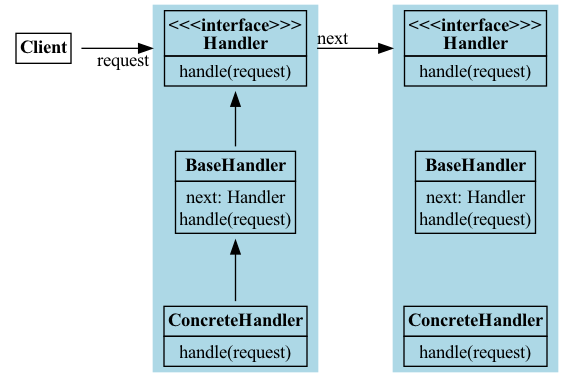

In [5]:
import graphviz
from IPython.display import Image
positions = {
    'Client': "-1,2!",
    'Handler1': "1,2!",
    'BaseHandler1': "1,0.5!",
    'ConcreteHandler1': "1,-1!",
    'Handler2': "3.5,2!",
    'BaseHandler2': "3.5,0.5!",
    'ConcreteHandler2': "3.5,-1!"
}
dot = graphviz.Digraph('Chain of Responsibility Handler', format='png',engine='neato')

# Set global node attributes to remove the border
dot.attr('node', shape='plaintext')

# Client Node
dot.node('Client', '''<
    <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0">
        <TR><TD><B>Client</B></TD></TR>
    </TABLE>>''', pos=positions['Client'])

with dot.subgraph(name="cluster_handler_chain1") as c:
    c.attr(label="", style="filled", fillcolor="lightblue", color="lightblue")
    # Handler Nodes
    c.node('Handler1', '''<
        <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0">
            <TR><TD><B>&lt;&lt;&lt;interface&gt;&gt;&gt;<BR/>Handler</B></TD></TR>
            <TR><TD>handle(request)</TD></TR>
        </TABLE>>''', pos=positions['Handler1'])

    c.node('BaseHandler1', '''<
        <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0">
            <TR><TD><B>BaseHandler</B></TD></TR>
            <TR><TD>next: Handler<BR/>handle(request)</TD></TR>
        </TABLE>>''', pos=positions['BaseHandler1'])

    # Concrete Handler Nodes
    c.node('ConcreteHandler1', '''<
        <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0">
            <TR><TD><B>ConcreteHandler</B></TD></TR>
            <TR><TD>handle(request)</TD></TR>
        </TABLE>>''', pos=positions['ConcreteHandler1'])
    c.edge('BaseHandler1', 'Handler1')
    c.edge('ConcreteHandler1', 'BaseHandler1')

with dot.subgraph(name="cluster_handler_chain2") as d:
    d.attr(label="", style="filled", fillcolor="lightblue", color="lightblue")
    # Handler Nodes
    d.node('Handler2', '''<
        <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0">
            <TR><TD><B>&lt;&lt;&lt;interface&gt;&gt;&gt;<BR/>Handler</B></TD></TR>
            <TR><TD>handle(request)</TD></TR>
        </TABLE>>''', pos=positions['Handler2'])

    d.node('BaseHandler2', '''<
        <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0">
            <TR><TD><B>BaseHandler</B></TD></TR>
            <TR><TD>next: Handler<BR/>handle(request)</TD></TR>
        </TABLE>>''', pos=positions['BaseHandler2'])

    # Concrete Handler Nodes
    d.node('ConcreteHandler2', '''<
        <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0">
            <TR><TD><B>ConcreteHandler</B></TD></TR>
            <TR><TD>handle(request)</TD></TR>
        </TABLE>>''', pos=positions['ConcreteHandler2'])
    c.edge('BaseHandler2', 'Handler2')
    c.edge('ConcreteHandler2', 'BaseHandler1')

# Edges
dot.edge('Client', 'Handler1', label='request')
dot.edge('Handler1', 'Handler2', label='next')


# Render and view the diagram
dot.render('chain_of_responsibility_handler_diagram', view=False)

# Display the image in Jupyter Notebook
Image("./chain_of_responsibility_handler_diagram.png")

### Chain Setup
The Client sends the request to chain, where the handler decides whether to process the request by invoking the handle method or pass the request to the next handler without invoking the handle method. 

When the handle method is invoked, it determins whether to reject the request where the chain is short circuited and an error is sent back to the client, or returned the processed request back to the current handler  where the request is passed to the next handler.

Below is an architectural diagram of the Chain of Responsibility, where the dotted edges signifies the possible path that the request follows.

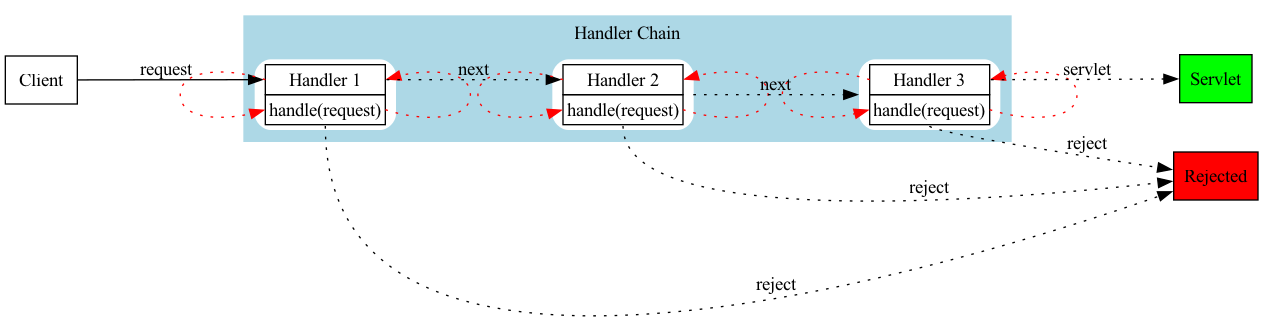

In [10]:
from graphviz import Digraph
from IPython.display import Image

# Create a new directed graph with left-to-right direction
dot = Digraph("Chain of Responsibility", graph_attr={'rankdir': 'LR', 'ranksep': '1.3'})

# Add Client node
dot.node("Client", "Client", shape="rect")

# Create a cluster for Handler Chain with light blue background
with dot.subgraph(name="cluster_handler_chain") as c:
    c.attr(label="Handler Chain", style="filled", fillcolor="lightblue", color="lightblue")
    c.node("Handler1", '''<
        <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0">
            <TR><TD PORT="handler">Handler 1</TD></TR>
            <TR><TD PORT="handle">handle(request)</TD></TR>
        </TABLE>>''', shape="none", style="rounded,filled", fillcolor="#ffffff")
    c.node("Handler2", '''<
        <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0">
            <TR><TD PORT="handler">Handler 2</TD></TR>
            <TR><TD PORT="handle">handle(request)</TD></TR>
        </TABLE>>''', shape="none", style="rounded,filled", fillcolor="#ffffff")
    c.node("Handler3", '''<
        <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0">
            <TR><TD PORT="handler">Handler 3</TD></TR>
            <TR><TD PORT="handle">handle(request)</TD></TR>
        </TABLE>>''', shape="none", style="rounded,filled", fillcolor="#ffffff")

    c.edge("Handler1:handler:w", "Handler1:handle:w", style="dotted", color="red")
    c.edge("Handler2:handler:w", "Handler2:handle:w",  style="dotted", color="red")
    c.edge("Handler3:handler:w", "Handler3:handle:w",  style="dotted", color="red")
    c.edge("Handler1:handle:e", "Handler1:handler:e",  style="dotted", color="red")
    c.edge("Handler2:handle:e", "Handler2:handler:e",  style="dotted", color="red")
    c.edge("Handler3:handle:e", "Handler3:handler:e",  style="dotted", color="red")
    
    # Regular processing path
    c.edge("Handler1:handler", "Handler2:handler", label="next", style="dotted")
    c.edge("Handler2", "Handler3", label="next", style="dotted")


# Add Resolved node
dot.node("Servlet", "Servlet", shape="rect", style="filled", fillcolor="green")
dot.node("Rejected", "Rejected", shape="rect", style="filled", fillcolor="red")

dot.edge("Handler1:handle:s", "Rejected", label="reject", style="dotted")
dot.edge("Handler2:handle:s", "Rejected", label="reject", style="dotted")
dot.edge("Handler3:handle:s", "Rejected", label="reject", style="dotted")

# Add edges from Client to first Handler and last Handler to Resolved
dot.edge("Client", "Handler1:handler:w", label="request")
dot.edge("Handler3:handler:e", "Servlet", label="servlet", style="dotted")

# Render the graph
dot.render("./chain_of_responsibility", format="png", view=False)

# Display the image in Jupyter Notebook
Image("./chain_of_responsibility.png")

Example of a request that got rejected By Handler 2.

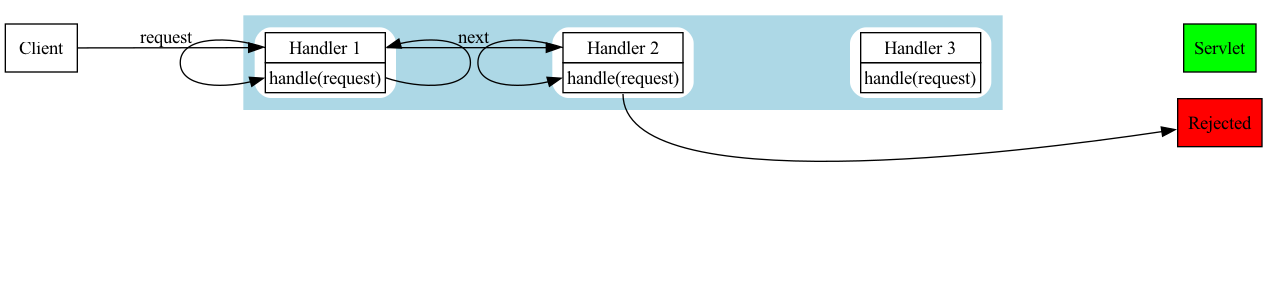

In [11]:
from graphviz import Digraph
from IPython.display import Image

# Create a new directed graph with left-to-right direction
dot = Digraph("Chain of Responsibility Rejected", graph_attr={'rankdir': 'LR', 'ranksep': '1.3'})

# Add Client node
dot.node("Client", "Client", shape="rect")

# Create a cluster for Handler Chain with light blue background
with dot.subgraph(name="cluster_handler_chain") as c:
    c.attr(style="filled", fillcolor="lightblue", color="lightblue")
    c.node("Handler1", '''<
        <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0">
            <TR><TD PORT="handler">Handler 1</TD></TR>
            <TR><TD PORT="handle">handle(request)</TD></TR>
        </TABLE>>''', shape="none", style="rounded,filled", fillcolor="#ffffff")
    c.node("Handler2", '''<
        <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0">
            <TR><TD PORT="handler">Handler 2</TD></TR>
            <TR><TD PORT="handle">handle(request)</TD></TR>
        </TABLE>>''', shape="none", style="rounded,filled", fillcolor="#ffffff")
    c.node("Handler3", '''<
        <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0">
            <TR><TD PORT="handler">Handler 3</TD></TR>
            <TR><TD PORT="handle">handle(request)</TD></TR>
        </TABLE>>''', shape="none", style="rounded,filled", fillcolor="#ffffff")

    c.edge("Handler1:handler:w", "Handler1:handle:w")
    c.edge("Handler2:handler:w", "Handler2:handle:w")
    c.edge("Handler3:handler:w", "Handler3:handle:w", style="invis")
    c.edge("Handler1:handle:e", "Handler1:handler:e")
    c.edge("Handler2:handle:e", "Handler2:handler:e",  style="invis")
    c.edge("Handler3:handle:e", "Handler3:handler:e",  style="invis")
    
    # Regular processing path
    c.edge("Handler1:handler", "Handler2:handler", label="next")
    c.edge("Handler2", "Handler3", label="next", style="invis")


# Add Resolved node
dot.node("Servlet", "Servlet", shape="rect", style="filled", fillcolor="green")
dot.node("Rejected", "Rejected", shape="rect", style="filled", fillcolor="red")

dot.edge("Handler1:handle:s", "Rejected", style="invis")
dot.edge("Handler2:handle:s", "Rejected", abel="reject")
dot.edge("Handler3:handle:s", "Rejected", style="invis")

# Add edges from Client to first Handler and last Handler to Resolved
dot.edge("Client", "Handler1:handler:w", label="request")
dot.edge("Handler3:handler:e", "Servlet", label="resolved", style="invis")

# Render the graph
dot.render("./chain_of_responsibility_rejected", format="png", view=False)

# Display the image in Jupyter Notebook
Image("./chain_of_responsibility_rejected.png")

Example of a request that is not handled by Handler 2.

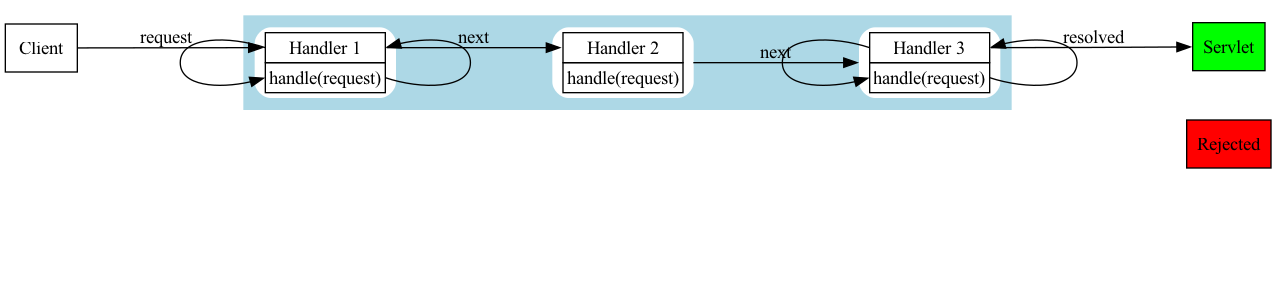

In [12]:
from graphviz import Digraph
from IPython.display import Image

# Create a new directed graph with left-to-right direction
dot = Digraph("Chain of Responsibility not handle by 2", graph_attr={'rankdir': 'LR', 'ranksep': '1.3'})

# Add Client node
dot.node("Client", "Client", shape="rect")

# Create a cluster for Handler Chain with light blue background
with dot.subgraph(name="cluster_handler_chain") as c:
    c.attr(style="filled", fillcolor="lightblue", color="lightblue")
    c.node("Handler1", '''<
        <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0">
            <TR><TD PORT="handler">Handler 1</TD></TR>
            <TR><TD PORT="handle">handle(request)</TD></TR>
        </TABLE>>''', shape="none", style="rounded,filled", fillcolor="#ffffff")
    c.node("Handler2", '''<
        <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0">
            <TR><TD PORT="handler">Handler 2</TD></TR>
            <TR><TD PORT="handle">handle(request)</TD></TR>
        </TABLE>>''', shape="none", style="rounded,filled", fillcolor="#ffffff")
    c.node("Handler3", '''<
        <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0">
            <TR><TD PORT="handler">Handler 3</TD></TR>
            <TR><TD PORT="handle">handle(request)</TD></TR>
        </TABLE>>''', shape="none", style="rounded,filled", fillcolor="#ffffff")

    c.edge("Handler1:handler:w", "Handler1:handle:w")
    c.edge("Handler2:handler:w", "Handler2:handle:w",  style="invis", color="red")
    c.edge("Handler3:handler:w", "Handler3:handle:w")
    c.edge("Handler1:handle:e", "Handler1:handler:e")
    c.edge("Handler2:handle:e", "Handler2:handler:e",  style="invis", color="red")
    c.edge("Handler3:handle:e", "Handler3:handler:e")
    
    # Regular processing path
    c.edge("Handler1:handler", "Handler2:handler", label="next")
    c.edge("Handler2", "Handler3", label="next")


# Add Resolved node
dot.node("Servlet", "Servlet", shape="rect", style="filled", fillcolor="green")
dot.node("Rejected", "Rejected", shape="rect", style="filled", fillcolor="red")

dot.edge("Handler1:handle:s", "Rejected", label="reject", style="invis")
dot.edge("Handler2:handle:s", "Rejected", label="reject", style="invis")
dot.edge("Handler3:handle:s", "Rejected", label="reject", style="invis")

# Add edges from Client to first Handler and last Handler to Resolved
dot.edge("Client", "Handler1:handler:w", label="request")
dot.edge("Handler3:handler:e", "Servlet", label="resolved")

# Render the graph
dot.render("./chain_of_responsibility_not_handled_by_2", format="png", view=False)

# Display the image in Jupyter Notebook
Image("./chain_of_responsibility_not_handled_by_2.png")

Example of a request that got handled by all handlers and is resolved

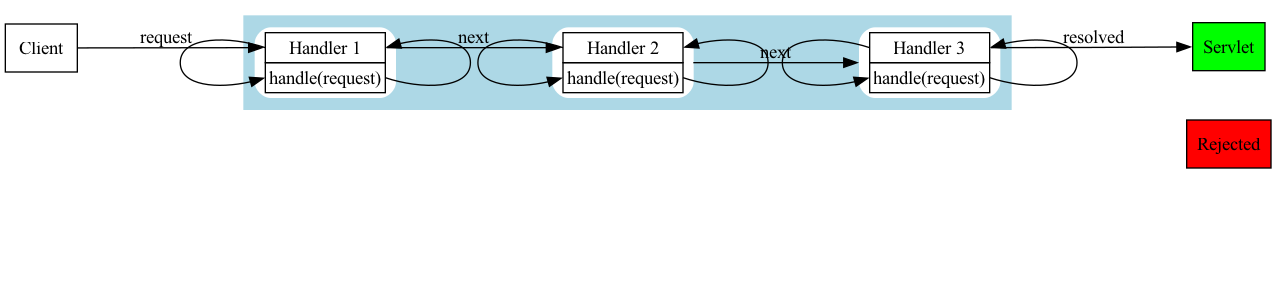

In [13]:
from graphviz import Digraph
from IPython.display import Image

# Create a new directed graph with left-to-right direction
dot = Digraph("Chain of Responsibility Handled by All", graph_attr={'rankdir': 'LR', 'ranksep': '1.3'})

# Add Client node
dot.node("Client", "Client", shape="rect")

# Create a cluster for Handler Chain with light blue background
with dot.subgraph(name="cluster_handler_chain") as c:
    c.attr(style="filled", fillcolor="lightblue", color="lightblue")
    c.node("Handler1", '''<
        <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0">
            <TR><TD PORT="handler">Handler 1</TD></TR>
            <TR><TD PORT="handle">handle(request)</TD></TR>
        </TABLE>>''', shape="none", style="rounded,filled", fillcolor="#ffffff")
    c.node("Handler2", '''<
        <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0">
            <TR><TD PORT="handler">Handler 2</TD></TR>
            <TR><TD PORT="handle">handle(request)</TD></TR>
        </TABLE>>''', shape="none", style="rounded,filled", fillcolor="#ffffff")
    c.node("Handler3", '''<
        <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0">
            <TR><TD PORT="handler">Handler 3</TD></TR>
            <TR><TD PORT="handle">handle(request)</TD></TR>
        </TABLE>>''', shape="none", style="rounded,filled", fillcolor="#ffffff")

    c.edge("Handler1:handler:w", "Handler1:handle:w")
    c.edge("Handler2:handler:w", "Handler2:handle:w")
    c.edge("Handler3:handler:w", "Handler3:handle:w")
    c.edge("Handler1:handle:e", "Handler1:handler:e")
    c.edge("Handler2:handle:e", "Handler2:handler:e")
    c.edge("Handler3:handle:e", "Handler3:handler:e")
    
    # Regular processing path
    c.edge("Handler1:handler", "Handler2:handler", label="next")
    c.edge("Handler2", "Handler3", label="next")


# Add Resolved node
dot.node("Servlet", "Servlet", shape="rect", style="filled", fillcolor="green")
dot.node("Rejected", "Rejected", shape="rect", style="filled", fillcolor="red")

dot.edge("Handler1:handle:s", "Rejected", label="reject", style="invis")
dot.edge("Handler2:handle:s", "Rejected", label="reject", style="invis")
dot.edge("Handler3:handle:s", "Rejected", label="reject", style="invis")

# Add edges from Client to first Handler and last Handler to Resolved
dot.edge("Client", "Handler1:handler:w", label="request")
dot.edge("Handler3:handler:e", "Servlet", label="resolved")

# Render the graph
dot.render("./chain_of_responsibility_handled_by_all", format="png", view=False)

# Display the image in Jupyter Notebook
Image("./chain_of_responsibility_handled_by_all.png")

# Spring Security Architecture
`Spring Security`'s architecture builds on top of `Spring Servlet Architecture`

## Spring Servlet Architecture
A request from the client will pass through a chain of filters that process the request before it reaches the `DispatcherServlet`. The `DispatcherServlet` will dispatch the request to the correct `Controller`. The `Controller` processes the request and returns a response, which travels back up the chain for post-processing before being returned to the client.

Filters in the chain can decide whether to process the request, pass it to the next filter, or block it. If a filter processes the request and encounters an exception, the request does not get passed to the next filter; instead, an error response is sent back to the client.

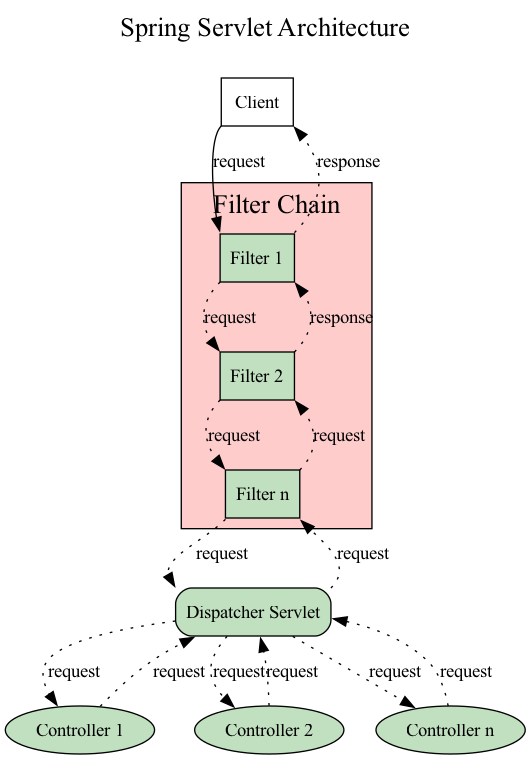

In [85]:
from graphviz import Digraph

# Create a new directed graph with left-to-right direction
dot = Digraph("Spring Servlet Architecture",  graph_attr={'label': 'Spring Servlet Architecture\n\n', 'labelloc': 't', 'fontsize': '20'}, engine="dot")

# Define positions for each node (optional)
positions = {
    'Client': "0,2!",
    'Filter1': "1,2!",
    'Filter2': "2,2!",
    'Filtern': "3,2!",
    'DispatcherServlet': "4,2!",
    'Controller1': "5,3!",
    'Controller2': "5,2!",
    'Controllern': "5,1!"
}
# Add nodes outside the cluster
dot.node("Client", "Client", shape="rect", pos=positions['Client'])


# Create a cluster for Filter Chain
with dot.subgraph(name="cluster_filter_chain") as c:
    c.attr(label="Filter Chain", style="filled", fillcolor="#ffcccc")
    c.node("Filter1", "Filter 1", shape="rect", style="filled", fillcolor="#c0e0c0", pos=positions['Filter1'])
    c.node("Filter2", "Filter 2", shape="rect", style="filled", fillcolor="#c0e0c0", pos=positions['Filter2'])
    c.node("Filtern", "Filter n", shape="rect", style="filled", fillcolor="#c0e0c0", pos=positions['Filtern'])   

    c.edge("Filter1:sw", "Filter2:nw", label="request", style="dotted")
    c.edge("Filter2:ne", "Filter1:se", label="response", style="dotted")
    c.edge("Filter2:sw", "Filtern:nw", label="request", style="dotted")
    c.edge("Filtern:ne", "Filter2:se", label="request", style="dotted")

dot.node("DispatcherServlet", "Dispatcher Servlet", style="filled,rounded", fillcolor="#c0e0c0", shape="rect", pos=positions['DispatcherServlet'])
dot.node("Controller1", "Controller 1", style="filled", fillcolor="#c0e0c0", pos=positions['Controller1'])
dot.node("Controller2", "Controller 2", style="filled", fillcolor="#c0e0c0", pos=positions['Controller2'])
dot.node("Controllern", "Controller n", style="filled", fillcolor="#c0e0c0", pos=positions['Controllern'])


# Add edges
dot.edge("Client:sw", "Filter1:nw", label="request")
dot.edge("Filter1:ne", "Client:se", label="response", style="dotted")
dot.edge("Filtern:sw", "DispatcherServlet:nw", label="request", style="dotted")
dot.edge("DispatcherServlet:ne", "Filtern:se", label="request", style="dotted")
dot.edge("DispatcherServlet", "Controller1", label="request", style="dotted")
dot.edge("Controller1", "DispatcherServlet", label="request", style="dotted")
dot.edge("DispatcherServlet", "Controller2", label="request", style="dotted")
dot.edge("Controller2", "DispatcherServlet", label="request", style="dotted")
dot.edge("DispatcherServlet", "Controllern", label="request", style="dotted")
dot.edge("Controllern", "DispatcherServlet", label="request", style="dotted")

# Render the graph
dot.render("./spring_servlet_architecture", format="png", view=False)

Image("./spring_servlet_architecture.png")

## Spring Security Filter Chain
Spring Security builds on top of the `Spring Servlet Architecture` by adding a dedicated security filter chain to the existing servlet filter chain. This security filter chain is responsible for handling authentication, authorization and other security checks before the request reach the business logic of our application(controller).

In [2]:
from graphviz import Digraph
from IPython.display import Image

# Create a new directed graph with left-to-right direction
dot = Digraph("Spring Security Architecture",  graph_attr={'label': 'Spring Security Architecture\n\n', 'labelloc': 't', 'fontsize': '20'}, engine="dot")

# Define positions for each node (optional)
positions = {
    'Client': "0,2!",
    'Filter1': "1,2!",
    'SecurityFilter1': "2,2!",
    'SecurityFilter2': "3,2!",
    'SecurityFilterm': "4,2!",
    'Filtern': "5,2!",
    'DispatcherServlet': "6,2!",
    'Controller1': "7,3!",
    'Controller2': "7,2!",
    'Controllern': "7,1!"
}
# Add nodes outside the cluster
dot.node("Client", "Client", shape="rect", pos=positions['Client'])


# Create a cluster for Filter Chain
with dot.subgraph(name="cluster_filter_chain") as c:
    c.attr(label="Filter Chain", style="filled", fillcolor="#ffcccc")
    c.node("Filter1", "Filter 1", shape="rect", style="filled", fillcolor="#c0e0c0", pos=positions['Filter1'])

    with c.subgraph(name="cluster_delegating_filter_chain_proxy") as d:
        d.attr(label="DelegatingFilterProxy", style="filled", fillcolor="#ccffff")
        
        with d.subgraph(name="cluster_filter_chain_proxy") as e:
            e.attr(label="FilterChainProxy", style="filled", fillcolor="#ccffcc")

            with e.subgraph(name="cluster_security_filter_chain") as f:
                f.attr(label="Security Filter Chain", style="filled", fillcolor="#ffffcc")
                f.node("SecurityFilter1", "Security Filter 1", shape="rect", style="filled", fillcolor="#c0e0c0", pos=positions['SecurityFilter1'])
                f.node("SecurityFilter2", "Security Filter 2", shape="rect", style="filled", fillcolor="#c0e0c0", pos=positions['SecurityFilter2'])
                f.node("SecurityFilterm", "Security Filter M", shape="rect", style="filled", fillcolor="#c0e0c0", pos=positions['SecurityFilterm'])
                f.edge("SecurityFilter1:sw", "SecurityFilter2:nw", label="request", style="dotted")
                f.edge("SecurityFilter2:ne", "SecurityFilter1:se", label="response", style="dotted")
                f.edge("SecurityFilter2:sw", "SecurityFilterm:nw", label="request", style="dotted")
                f.edge("SecurityFilterm:ne", "SecurityFilter2:se", label="request", style="dotted")   
                
    c.node("Filtern", "Filter n", shape="rect", style="filled", fillcolor="#c0e0c0", pos=positions['Filtern'])   

    c.edge("Filter1:sw", "SecurityFilter1:nw", label="request", style="dotted")
    c.edge("SecurityFilter1:ne", "Filter1:se", label="response", style="dotted")
    c.edge("SecurityFilterm:sw", "Filtern:nw", label="request", style="dotted")
    c.edge("Filtern:ne", "SecurityFilterm:se", label="request", style="dotted")

dot.node("DispatcherServlet", "Dispatcher Servlet", style="filled,rounded", fillcolor="#c0e0c0", shape="rect", pos=positions['DispatcherServlet'])
dot.node("Controller1", "Controller 1", style="filled", fillcolor="#c0e0c0", pos=positions['Controller1'])
dot.node("Controller2", "Controller 2", style="filled", fillcolor="#c0e0c0", pos=positions['Controller2'])
dot.node("Controllern", "Controller n", style="filled", fillcolor="#c0e0c0", pos=positions['Controllern'])


# Add edges
dot.edge("Client:sw", "Filter1:nw", label="request")
dot.edge("Filter1:ne", "Client:se", label="response", style="dotted")
dot.edge("Filtern:sw", "DispatcherServlet:nw", label="request", style="dotted")
dot.edge("DispatcherServlet:ne", "Filtern:se", label="request", style="dotted")
dot.edge("DispatcherServlet", "Controller1", label="request", style="dotted")
dot.edge("Controller1", "DispatcherServlet", label="request", style="dotted")
dot.edge("DispatcherServlet", "Controller2", label="request", style="dotted")
dot.edge("Controller2", "DispatcherServlet", label="request", style="dotted")
dot.edge("DispatcherServlet", "Controllern", label="request", style="dotted")
dot.edge("Controllern", "DispatcherServlet", label="request", style="dotted")

# Render the graph
dot.render("./spring_security_architecture", format="png", view=False)

Image("./spring_security_architecture.png")

ModuleNotFoundError: No module named 'Images'

The advantage of this architecture is that it is highly composable and configurable. We can easily add, remove, modify, reorder security filters, or swap `Security Filter Chains`.

### Choosing Security Filter Chain
The `FilterChainProxy` manages a list of `Security Filter Chain` instances. Based on the incoming request the `matches` method in the `SecurityFilterChain` interface will determines which `SecurityFilterChain` instance should handle the request.

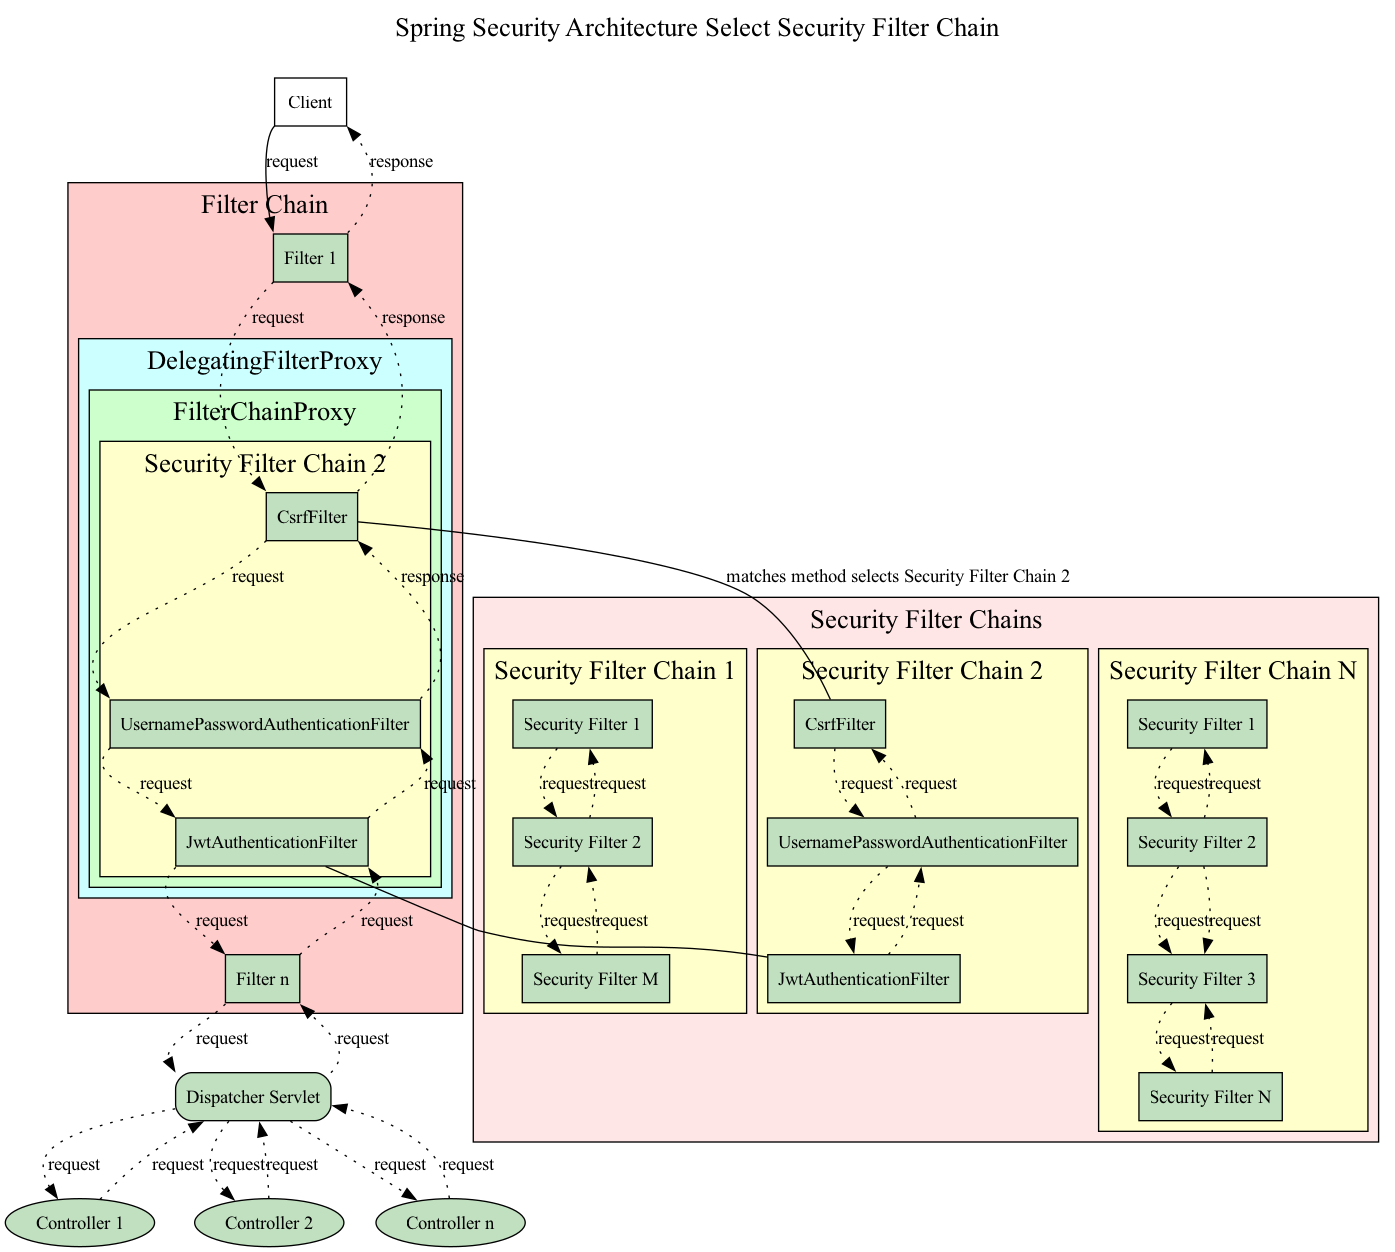

In [3]:
from graphviz import Digraph
from IPython.display import Image

# Create a new directed graph with left-to-right direction
dot = Digraph("Spring Security Architecture Select Security Filter Chain",  graph_attr={'label': 'Spring Security Architecture Select Security Filter Chain\n\n', 'labelloc': 't', 'fontsize': '20'}, engine="dot")

# Define positions for each node (optional)
positions = {
    'Client': "0,2!",
    'Filter1': "1,2!",
    'SecurityFilter1': "2,2!",
    'SecurityFilter2': "3,2!",
    'SecurityFilterm': "4,2!",
    'Filtern': "5,2!",
    'DispatcherServlet': "6,2!",
    'Controller1': "7,3!",
    'Controller2': "7,2!",
    'Controllern': "7,1!"
}
# Add nodes outside the cluster
dot.node("Client", "Client", shape="rect", pos=positions['Client'])


# Create a cluster for Filter Chain
with dot.subgraph(name="cluster_filter_chain") as c:
    c.attr(label="Filter Chain", style="filled", fillcolor="#ffcccc")
    c.node("Filter1", "Filter 1", shape="rect", style="filled", fillcolor="#c0e0c0", pos=positions['Filter1'])

    with c.subgraph(name="cluster_delegating_filter_chain_proxy") as d:
        d.attr(label="DelegatingFilterProxy", style="filled", fillcolor="#ccffff")
        
        with d.subgraph(name="cluster_filter_chain_proxy") as e:
            e.attr(label="FilterChainProxy", style="filled", fillcolor="#ccffcc")

            with e.subgraph(name="cluster_security_filter_chain") as f:
                f.attr(label="Security Filter Chain 2", style="filled", fillcolor="#ffffcc")
                f.node("SecurityFilter1", "CsrfFilter", shape="rect", style="filled", fillcolor="#c0e0c0", pos=positions['SecurityFilter1'])
                f.node("SecurityFilter2", "UsernamePasswordAuthenticationFilter", shape="rect", style="filled", fillcolor="#c0e0c0", pos=positions['SecurityFilter2'])
                f.node("SecurityFilterm", "JwtAuthenticationFilter", shape="rect", style="filled", fillcolor="#c0e0c0", pos=positions['SecurityFilterm'])
                f.edge("SecurityFilter1:sw", "SecurityFilter2:nw", label="request", style="dotted")
                f.edge("SecurityFilter2:ne", "SecurityFilter1:se", label="response", style="dotted")
                f.edge("SecurityFilter2:sw", "SecurityFilterm:nw", label="request", style="dotted")
                f.edge("SecurityFilterm:ne", "SecurityFilter2:se", label="request", style="dotted")   
                
    c.node("Filtern", "Filter n", shape="rect", style="filled", fillcolor="#c0e0c0", pos=positions['Filtern'])   

    c.edge("Filter1:sw", "SecurityFilter1:nw", label="request", style="dotted")
    c.edge("SecurityFilter1:ne", "Filter1:se", label="response", style="dotted")
    c.edge("SecurityFilterm:sw", "Filtern:nw", label="request", style="dotted")
    c.edge("Filtern:ne", "SecurityFilterm:se", label="request", style="dotted")

# Create a cluster for Security Filter Chains to illustrate selection
with dot.subgraph(name="cluster_security_filter_chains") as g:
    g.attr(label="Security Filter Chains", style="filled", fillcolor="#ffe6e6")

    with g.subgraph(name="cluster_security_filter_chain_1") as h:
        h.attr(label="Security Filter Chain 1", style="filled", fillcolor="#ffffcc")
        h.node("SecurityFilterChain1-1", "Security Filter 1", shape="rect", style="filled", fillcolor="#c0e0c0")
        h.node("SecurityFilterChain1-2", "Security Filter 2", shape="rect", style="filled", fillcolor="#c0e0c0")
        h.node("SecurityFilterChain1-m", "Security Filter M", shape="rect", style="filled", fillcolor="#c0e0c0")
        h.edge("SecurityFilterChain1-1", "SecurityFilterChain1-2", label="request", style="dotted")
        h.edge("SecurityFilterChain1-2", "SecurityFilterChain1-m", label="request", style="dotted")
        h.edge("SecurityFilterChain1-2", "SecurityFilterChain1-1",  label="request", style="dotted")
        h.edge("SecurityFilterChain1-m", "SecurityFilterChain1-2", label="request", style="dotted")
        
    with g.subgraph(name="cluster_security_filter_chain_2") as i:
        i.attr(label="Security Filter Chain 2", style="filled", fillcolor="#ffffcc")
        i.node("SecurityFilterChain2-1", "CsrfFilter", shape="rect", style="filled", fillcolor="#c0e0c0")
        i.node("SecurityFilterChain2-2", "UsernamePasswordAuthenticationFilter", shape="rect", style="filled", fillcolor="#c0e0c0")
        i.node("SecurityFilterChain2-m", "JwtAuthenticationFilter", shape="rect", style="filled", fillcolor="#c0e0c0")
        i.edge("SecurityFilterChain2-1", "SecurityFilterChain2-2", label="request", style="dotted")
        i.edge("SecurityFilterChain2-2", "SecurityFilterChain2-m", label="request", style="dotted")
        i.edge("SecurityFilterChain2-2", "SecurityFilterChain2-1", label="request", style="dotted")
        i.edge("SecurityFilterChain2-m", "SecurityFilterChain2-2", label="request", style="dotted")
        
    with g.subgraph(name="cluster_security_filter_chain_n") as i:
        i.attr(label="Security Filter Chain N", style="filled", fillcolor="#ffffcc")
        i.node("SecurityFilterChain3-1", "Security Filter 1", shape="rect", style="filled", fillcolor="#c0e0c0")
        i.node("SecurityFilterChain3-2", "Security Filter 2", shape="rect", style="filled", fillcolor="#c0e0c0")
        i.node("SecurityFilterChain3-3", "Security Filter 3", shape="rect", style="filled", fillcolor="#c0e0c0")
        i.node("SecurityFilterChain3-n", "Security Filter N", shape="rect", style="filled", fillcolor="#c0e0c0")
        i.edge("SecurityFilterChain3-1", "SecurityFilterChain3-2", label="request", style="dotted")
        i.edge("SecurityFilterChain3-2", "SecurityFilterChain3-3", label="request", style="dotted")
        i.edge("SecurityFilterChain3-2", "SecurityFilterChain3-1", label="request", style="dotted")
        i.edge("SecurityFilterChain3-2", "SecurityFilterChain3-3", label="request", style="dotted")
        i.edge("SecurityFilterChain3-3", "SecurityFilterChain3-n", label="request", style="dotted")       
        i.edge("SecurityFilterChain3-n", "SecurityFilterChain3-3", label="request", style="dotted")     

dot.node("DispatcherServlet", "Dispatcher Servlet", style="filled,rounded", fillcolor="#c0e0c0", shape="rect", pos=positions['DispatcherServlet'])
dot.node("Controller1", "Controller 1", style="filled", fillcolor="#c0e0c0", pos=positions['Controller1'])
dot.node("Controller2", "Controller 2", style="filled", fillcolor="#c0e0c0", pos=positions['Controller2'])
dot.node("Controllern", "Controller n", style="filled", fillcolor="#c0e0c0", pos=positions['Controllern'])


# Add edges
dot.edge("Client:sw", "Filter1:nw", label="request")
dot.edge("Filter1:ne", "Client:se", label="response", style="dotted")
dot.edge("Filtern:sw", "DispatcherServlet:nw", label="request", style="dotted")
dot.edge("DispatcherServlet:ne", "Filtern:se", label="request", style="dotted")
dot.edge("DispatcherServlet", "Controller1", label="request", style="dotted")
dot.edge("Controller1", "DispatcherServlet", label="request", style="dotted")
dot.edge("DispatcherServlet", "Controller2", label="request", style="dotted")
dot.edge("Controller2", "DispatcherServlet", label="request", style="dotted")
dot.edge("DispatcherServlet", "Controllern", label="request", style="dotted")
dot.edge("Controllern", "DispatcherServlet", label="request", style="dotted")

# Add edge from FilterChainProxy to Security Filter Chain 2
dot.edge("SecurityFilter1", "SecurityFilterChain2-1", label="matches method selects Security Filter Chain 2", dir="none")
dot.edge("SecurityFilterm", "SecurityFilterChain2-m", dir="none")

# Render the graph
dot.render("./spring_security_architecture_select_security_filter_chain", format="png", view=False)

Image("./spring_security_architecture_select_security_filter_chain.png")

### Adding Security Filter to the Chain
Lets add the `UsernamePasswordAuthenticationFilter` filter after `Security Filter 2` and before `Security Filter N`.

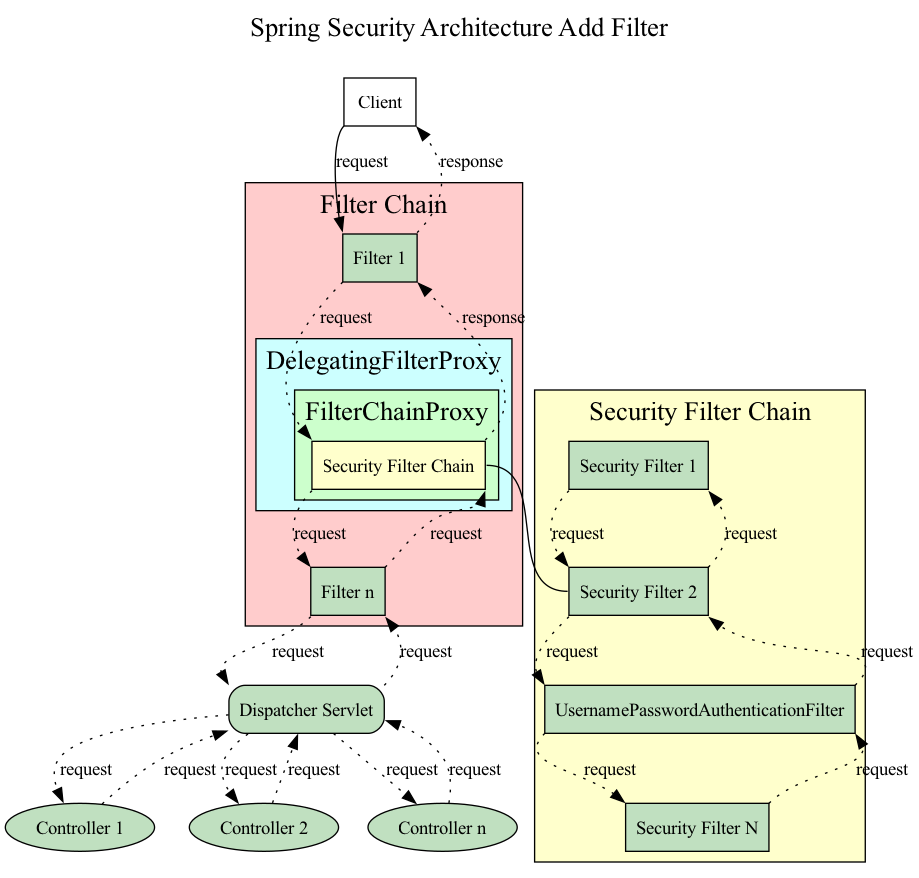

In [145]:
from graphviz import Digraph

# Create a new directed graph with left-to-right direction
dot = Digraph("Spring Security Architecture Add Filter",  graph_attr={'label': 'Spring Security Architecture Add Filter\n\n', 'labelloc': 't', 'fontsize': '20'}, engine="dot")

# Define positions for each node (optional)
positions = {
    'Client': "0,2!",
    'Filter1': "1,2!",
    "SecurityFilterChain": "2,2!",
    'SecurityFilter1': "2,5!",
    'SecurityFilter2': "3,5!",
    'SecurityFiltern': "4,5!",
    'Filtern': "3,2!",
    'DispatcherServlet': "5,2!",
    'Controller1': "6,3!",
    'Controller2': "6,2!",
    'Controllern': "6,1!"
}
# Add nodes outside the cluster
dot.node("Client", "Client", shape="rect", pos=positions['Client'])


# Create a cluster for Filter Chain
with dot.subgraph(name="cluster_filter_chain") as c:
    c.attr(label="Filter Chain", style="filled", fillcolor="#ffcccc")
    c.node("Filter1", "Filter 1", shape="rect", style="filled", fillcolor="#c0e0c0", pos=positions['Filter1'])

    with c.subgraph(name="cluster_delegating_filter_chain_proxy") as d:
        d.attr(label="DelegatingFilterProxy", style="filled", fillcolor="#ccffff")
        
        with d.subgraph(name="cluster_filter_chain_proxy") as e:
            e.attr(label="FilterChainProxy", style="filled", fillcolor="#ccffcc")
            e.node("SecurityFilterChain", "Security Filter Chain", shape="rect", style="filled", fillcolor="#ffffcc", pos=positions['SecurityFilterChain'])   
                
    c.node("Filtern", "Filter n", shape="rect", style="filled", fillcolor="#c0e0c0", pos=positions['Filtern'])   

    c.edge("Filter1:sw", "SecurityFilterChain:nw", label="request", style="dotted")
    c.edge("SecurityFilterChain:ne", "Filter1:se", label="response", style="dotted")
    c.edge("SecurityFilterChain:sw", "Filtern:nw", label="request", style="dotted")
    c.edge("Filtern:ne", "SecurityFilterChain:se", label="request", style="dotted")

# Create a cluster for Security Filter Chains to illustrate selection
with dot.subgraph(name="cluster_security_filter_chain") as g:
    g.attr(label="Security Filter Chain", style="filled", fillcolor="#ffffcc")
    g.node("SecurityFilter1", "Security Filter 1", shape="rect", style="filled", fillcolor="#c0e0c0", pos=positions['SecurityFilter1'])
    g.node("SecurityFilter2", "Security Filter 2", shape="rect", style="filled", fillcolor="#c0e0c0", pos=positions['SecurityFilter2'])
    g.node("UsernamePasswordAuthenticationFilter", "UsernamePasswordAuthenticationFilter", shape="rect", style="filled", fillcolor="#c0e0c0")
    g.node("SecurityFiltern", "Security Filter N", shape="rect", style="filled", fillcolor="#c0e0c0", pos=positions['SecurityFiltern'])
    g.edge("SecurityFilter1:sw", "SecurityFilter2:nw", label="request", style="dotted")
    g.edge("SecurityFilter2:ne", "SecurityFilter1:se", label="request", style="dotted")
    g.edge("SecurityFilter2:sw", "UsernamePasswordAuthenticationFilter:nw", label="request", style="dotted")
    g.edge("UsernamePasswordAuthenticationFilter:ne", "SecurityFilter2:se", label="request", style="dotted")
    g.edge("UsernamePasswordAuthenticationFilter:sw", "SecurityFiltern:nw", label="request", style="dotted")
    g.edge("SecurityFiltern:ne", "UsernamePasswordAuthenticationFilter:se", label="request", style="dotted")

dot.node("DispatcherServlet", "Dispatcher Servlet", style="filled,rounded", fillcolor="#c0e0c0", shape="rect", pos=positions['DispatcherServlet'])
dot.node("Controller1", "Controller 1", style="filled", fillcolor="#c0e0c0", pos=positions['Controller1'])
dot.node("Controller2", "Controller 2", style="filled", fillcolor="#c0e0c0", pos=positions['Controller2'])
dot.node("Controllern", "Controller n", style="filled", fillcolor="#c0e0c0", pos=positions['Controllern'])


# Add edges
dot.edge("Client:sw", "Filter1:nw", label="request")
dot.edge("Filter1:ne", "Client:se", label="response", style="dotted")
dot.edge("Filtern:sw", "DispatcherServlet:nw", label="request", style="dotted")
dot.edge("DispatcherServlet:ne", "Filtern:se", label="request", style="dotted")
dot.edge("DispatcherServlet", "Controller1", label="request", style="dotted")
dot.edge("Controller1", "DispatcherServlet", label="request", style="dotted")
dot.edge("DispatcherServlet", "Controller2", label="request", style="dotted")
dot.edge("Controller2", "DispatcherServlet", label="request", style="dotted")
dot.edge("DispatcherServlet", "Controllern", label="request", style="dotted")
dot.edge("Controllern", "DispatcherServlet", label="request", style="dotted")

# # Add edge from FilterChainProxy to Security Filter Chain 2
dot.edge("SecurityFilterChain:e", "SecurityFilter2:w", dir="none")

# Render the graph
dot.render("./spring_security_architecture_add_filter", format="png", view=False)

Image("./spring_security_architecture_add_filter.png")

### Removing Security Filter from the Chain
Lets remove `Security Filter 2` from the Chain.

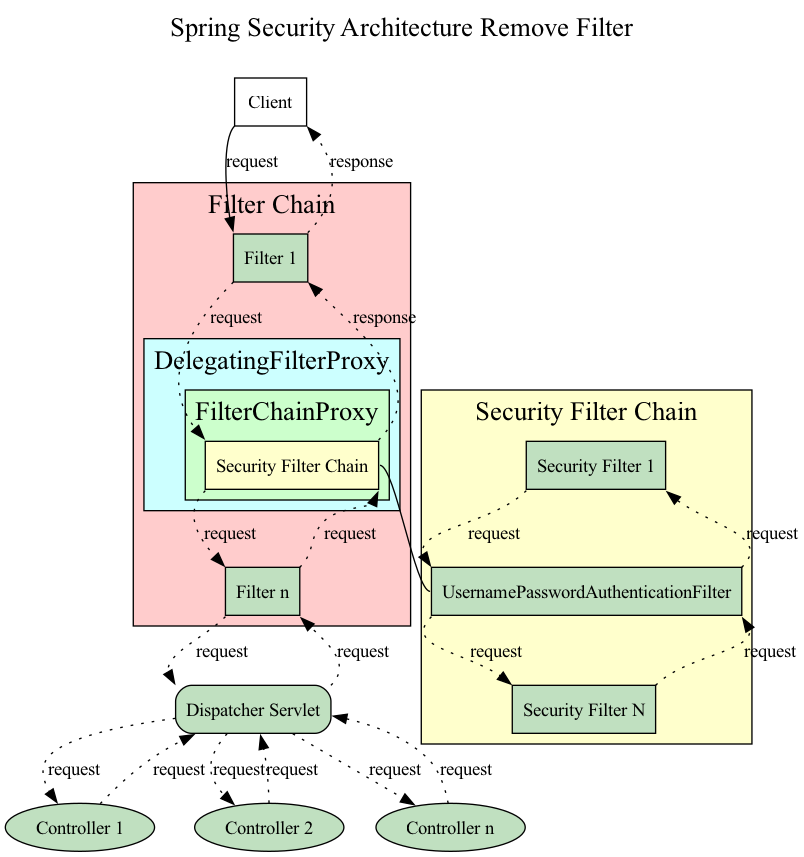

In [4]:
from graphviz import Digraph

# Create a new directed graph with left-to-right direction
dot = Digraph("Spring Security Architecture Remove Filter",  graph_attr={'label': 'Spring Security Architecture Remove Filter\n\n', 'labelloc': 't', 'fontsize': '20'}, engine="dot")

# Define positions for each node (optional)
positions = {
    'Client': "0,2!",
    'Filter1': "1,2!",
    "SecurityFilterChain": "2,2!",
    'Filtern': "3,2!",
    'DispatcherServlet': "5,2!",
    'Controller1': "6,3!",
    'Controller2': "6,2!",
    'Controllern': "6,1!"
}
# Add nodes outside the cluster
dot.node("Client", "Client", shape="rect", pos=positions['Client'])


# Create a cluster for Filter Chain
with dot.subgraph(name="cluster_filter_chain") as c:
    c.attr(label="Filter Chain", style="filled", fillcolor="#ffcccc")
    c.node("Filter1", "Filter 1", shape="rect", style="filled", fillcolor="#c0e0c0", pos=positions['Filter1'])

    with c.subgraph(name="cluster_delegating_filter_chain_proxy") as d:
        d.attr(label="DelegatingFilterProxy", style="filled", fillcolor="#ccffff")
        
        with d.subgraph(name="cluster_filter_chain_proxy") as e:
            e.attr(label="FilterChainProxy", style="filled", fillcolor="#ccffcc")
            e.node("SecurityFilterChain", "Security Filter Chain", shape="rect", style="filled", fillcolor="#ffffcc", pos=positions['SecurityFilterChain'])   
                
    c.node("Filtern", "Filter n", shape="rect", style="filled", fillcolor="#c0e0c0", pos=positions['Filtern'])   

    c.edge("Filter1:sw", "SecurityFilterChain:nw", label="request", style="dotted")
    c.edge("SecurityFilterChain:ne", "Filter1:se", label="response", style="dotted")
    c.edge("SecurityFilterChain:sw", "Filtern:nw", label="request", style="dotted")
    c.edge("Filtern:ne", "SecurityFilterChain:se", label="request", style="dotted")

# Create a cluster for Security Filter Chains to illustrate selection
with dot.subgraph(name="cluster_security_filter_chain") as g:
    g.attr(label="Security Filter Chain", style="filled", fillcolor="#ffffcc")
    g.node("SecurityFilter1", "Security Filter 1", shape="rect", style="filled", fillcolor="#c0e0c0")
    g.node("UsernamePasswordAuthenticationFilter", "UsernamePasswordAuthenticationFilter", shape="rect", style="filled", fillcolor="#c0e0c0")
    g.node("SecurityFiltern", "Security Filter N", shape="rect", style="filled", fillcolor="#c0e0c0")
    g.edge("SecurityFilter1:sw", "UsernamePasswordAuthenticationFilter:nw", label="request", style="dotted")
    g.edge("UsernamePasswordAuthenticationFilter:ne", "SecurityFilter1:se", label="request", style="dotted")
    g.edge("UsernamePasswordAuthenticationFilter:sw", "SecurityFiltern:nw", label="request", style="dotted")
    g.edge("SecurityFiltern:ne", "UsernamePasswordAuthenticationFilter:se", label="request", style="dotted")

dot.node("DispatcherServlet", "Dispatcher Servlet", style="filled,rounded", fillcolor="#c0e0c0", shape="rect", pos=positions['DispatcherServlet'])
dot.node("Controller1", "Controller 1", style="filled", fillcolor="#c0e0c0", pos=positions['Controller1'])
dot.node("Controller2", "Controller 2", style="filled", fillcolor="#c0e0c0", pos=positions['Controller2'])
dot.node("Controllern", "Controller n", style="filled", fillcolor="#c0e0c0", pos=positions['Controllern'])


# Add edges
dot.edge("Client:sw", "Filter1:nw", label="request")
dot.edge("Filter1:ne", "Client:se", label="response", style="dotted")
dot.edge("Filtern:sw", "DispatcherServlet:nw", label="request", style="dotted")
dot.edge("DispatcherServlet:ne", "Filtern:se", label="request", style="dotted")
dot.edge("DispatcherServlet", "Controller1", label="request", style="dotted")
dot.edge("Controller1", "DispatcherServlet", label="request", style="dotted")
dot.edge("DispatcherServlet", "Controller2", label="request", style="dotted")
dot.edge("Controller2", "DispatcherServlet", label="request", style="dotted")
dot.edge("DispatcherServlet", "Controllern", label="request", style="dotted")
dot.edge("Controllern", "DispatcherServlet", label="request", style="dotted")

# # Add edge from FilterChainProxy to Security Filter Chain 2
dot.edge("SecurityFilterChain:e", "UsernamePasswordAuthenticationFilter:w", dir="none")

# Render the graph
dot.render("./spring_security_architecture_remove_filter", format="png", view=False)

Image("./spring_security_architecture_remove_filter.png")

## Security Filters
<img src="./Security-Filter-Chain.png"/>

The `FilterChainProxy` stores the `SecurityFilterChain` in a list called `additionalFilters`, a counter named `currentPosition` is used to manage where along the chain the request is being processed. In the image above, the `currentPosition` is 3 so the request is being processed in the `SecurityContextHolderFilter`.

### DisableEncodeUrlFilter
The `DisableEncodeUrlFilter` ensures that the session ids are not exposed through URLs. By preventing the alteration of URLs to include session infomation.
[code](https://github.com/spring-projects/spring-security/blob/3b9a2c3def8592f176194d77587d8d4bb9504db2/web/src/main/java/org/springframework/security/web/session/DisableEncodeUrlFilter.java)

The filter pass the request to the next filter, and wraps the response in `DisableEncodeUrlResponseWrapper`. By overriding the `encodeRedirectURL` and `encodeURL` method that returns the url is returns as it is it ensures that the sessionid is not appended to the url.

### WebAsyncManagerIntegrationFilter
The `WebAsyncManagerIntegrationFilter` ensures that the `SecurityContext` is propertly propagated and accessible during asynchronous web requests in a Spring application.


### SecurityContextHolderFilter
The `SecurityContextHolderFilter` is responsible for ensuring that the `SecurityContext` is properly managed throughout the lifecycle of the request and cleaned up at the end of the request. The `SecurityContext` holds the user's authentication information, such as their identity, authorities.

When the incoming request reaches the `SecurityContextHolderFilter` it retrieves the `SecurityContext` from the `SecurityContextRepository` using the session id, or initializes one if it doesn't exist. Then saves the `SecurityContext` in the `SecurityContextHolder`.

After the request has been processed in the controller and a response is being returned back. When the outgoing response reaches the `SecurityContextHolderFilter`, it stores the `SecurityContext` into `SecurityContextRepository` preserving the user's authentication state for future request for the current session. Then it cleans up the `SecurityContextHolder` by removing the `SecurityContext` preventing sensitive information from leaking between requests or threads of different sessions.

### HeaderWriterFilter
The `HeaderWriterFilter` in Spring security adds importantsucurity headers to HTTP responses to protect against common web vulnerabilities, such as XSS and clickjacking. It's confiugrableand helps enforce security policies in the browser.

### CorsFilter
The `CorsFilter` takes care of cross-site site forgery (CSRF) protection.

### CsrfFilter
The `CsrfFilter` takes care of cross-site request forgery (CSRF) protection

### LogoutFilter
The `LogoutFilter` handles the logout process. It intercepts logout requests, invalidates the user's session, clears the `SecurityContext`, and redirectes the user to a specified logout success URL or returns a response indicating a successful logout. It ensures that users are proprty logout and any authentication data is securely removed.

### UsernamePasswordAuthenticationFilter
The `UsernamePasswordAuthenticationFilter` processes login requests, by intercepting HTTP requests (typically POST reqeusts to `/login`) containing a username and password. The filter uses an `AuthenticationManager` to authenticate the username and password, then handles the success or failure of the login attempt in a Spring security application.

### DefaultLoginPageGeneratingFilter
This filter generates and displays a default login page when a custom one is not provided. It checks if the incoming request matches specific URLs like `/login`, `/logout`, or `/login?error`. If the request matches `/login`, it generates a login page for the user. If the request does not match these URLs or if authentication has already been performed, the filter does nothing.

## DefaultLogoutPageGeneratingFilter
The `DefaultLogoutPageGeneratingFilter` is triggered when the user access the (`/logout`) endpoint, it automatically generates a basic logout confirmation page when no custom logout page.

### BasicAuthenticationFilter
The `BasicAuthenticationFilter` process HTTP basic authentication requests. The filter intercepts incoming HTTP requests with the `Authorization` header containing the the encoded username and password.
```
Authorization: Basic <Base64EncodedCredentials>
```
When decoded the username and password is in the form:
```
<username>:<password>
```
The filter then authenticate the decoded username and password, and store the authentication result in the security context.

## RequestCacheAwareFilter
The `RequestCacheAwareFilter` restores a user's original request after they successfully log in, ensuring that they are redirected back to the page they initially wanted to access, enhancing the user experience.

## SecurityContextHolderAwareRequestFilter
The `SecurityContextHolderAwareRequestFilter` wraps the HTTP request in a Spring Security-aware wrapper, providing easy access to security-related methods, such as role checking and retrieving the authenticated user’s details, throughout your application.

## AnonymousAuthenticationFilter
The `AnonymousAuthenticationFilter` assigns an anonymous identity to unauthenticated user, allowing the application to apply consistent security rules for both authenticated and anonymous users. It enables access to public resources while still protecting sensitive ones. An example is when an unauthenticated user accesses an endpoint that has been configure as `permitAll()` in the security config, the user access the resource as an anonymous user.


### ExceptionTranslationFilter
The `ExceptionTranslationFilter` captures all authentication and authorization exceptions. It catches `AuthenticationException` and `AccessDeniedException`.
- If an unauthenticated user tries to access a protected resource, the filter redirects the user to the login page.
- If an authenticated user tries to access a resource they are not authorized for, the filter catches the `AccessDeniedException` and typically returns a 403 Forbidden response.
The login page can be generated by the `DefaultLoginPageGeneratingFilter`, which allows users to submit their credentials via a POST call to /login. This POST request is then processed by the `UsernamePasswordAuthenticationFilter` to authenticate the user.

### AuthorizationFilter
This is the last filter in the filter chain, it is responsible for enforcing access control by determining whether an authenticated user has the necessary roles or permissions to access a particular resource. After authentication has been processed, this filter checks the user's roles against the security configuration to decide if access should be granted. If the user is authorized, the request proceeds to the relevant resource, such as a controller; if not, the filter denies access, typically resulting in a 403 Forbidden response. Additionally, the filter handles whitelisted URLs, allowing public access to certain endpoints without requiring authentication or specific permissions.

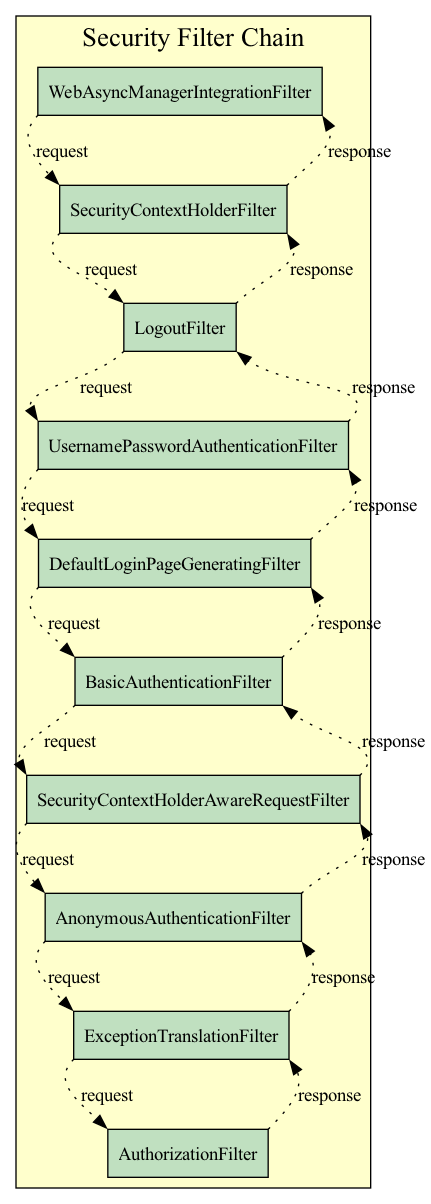

In [153]:
from graphviz import Digraph

# Create a new directed graph with left-to-right direction
dot = Digraph("Default Security Filter Chain",  graph_attr={'labelloc': 't', 'fontsize': '20'}, engine="dot")

# Define positions for each node (optional)
positions = {
    "SecurityFilterChain": "2,2!",
}

defaultFilterChain = ["WebAsyncManagerIntegrationFilter", "SecurityContextHolderFilter", "LogoutFilter", "UsernamePasswordAuthenticationFilter", 
                      "DefaultLoginPageGeneratingFilter", "BasicAuthenticationFilter",
                    "SecurityContextHolderAwareRequestFilter", "AnonymousAuthenticationFilter",
                      "ExceptionTranslationFilter", "AuthorizationFilter"]

# Create a cluster for Security Filter Chains to illustrate selection
with dot.subgraph(name="cluster_security_filter_chain") as g:
    g.attr(label="Security Filter Chain", style="filled", fillcolor="#ffffcc")
    for securityFilterChain in defaultFilterChain:
        g.node(securityFilterChain, 
               shape="rect", style="filled", fillcolor="#c0e0c0")

    for i in range(len(defaultFilterChain) - 1):
        g.edge(defaultFilterChain[i] + ":sw", defaultFilterChain[i+1] + ":nw", label="request", style="dotted")
        g.edge(defaultFilterChain[i+1] + ":ne", defaultFilterChain[i] + ":se", label="response", style="dotted") 

# Render the graph
dot.render("./images/usernamepasswordauthenticationflow/default_security_filter_chain", format="png", view=False)

Image("./images/usernamepasswordauthenticationflow/default_security_filter_chain.png")

# Setting Up Spring Security
To get started with `Spring Security`, add the following dependency to `pom.xml`

```
<dependencies>
    ...
    <!-- Spring Security -->
    <dependency>
        <groupId>org.springframework.boot</groupId>
        <artifactId>spring-boot-starter-security</artifactId>
    </dependency>
    ...
</dependencies>
```

# Default Security Filter Chain
https://medium.com/stackademic/spring-security-default-security-filter-chain-b544502ba5d8

Then run 
```
./mvnw spring-boot:run
```

When your application start up it will log your `Default Security Filter Chain` along with the generated password.
<img src="./Default-Security-Filter-Chain.png"/>

The default setting is when you access any endpoint you are presented with the login page.

<img src="./Login-Page.png"/>

Where the default username is `user`

And the password is generated and logged during application startup.

Lets look at the Default `Security Filters` in the chain.
```
DisableEncodeUrlFilter
WebAsyncManagerIntegrationFilter
SecurityContextHolderFilter
HeaderWriterFilter
CorsFilter
CsrfFilter
LogoutFilter
UsernamePasswordAuthenticationFilter
DefaultLoginPageGeneratingFilter
DefaultLogoutPageGeneratingFilter
BasicAuthenticationFilter
RequestCacheAwareFilter
SecurityContextHolderAwareRequestFilter
AnonymousAuthenticationFilter
ExceptionTranslationFilter
AuthorizationFilter
```

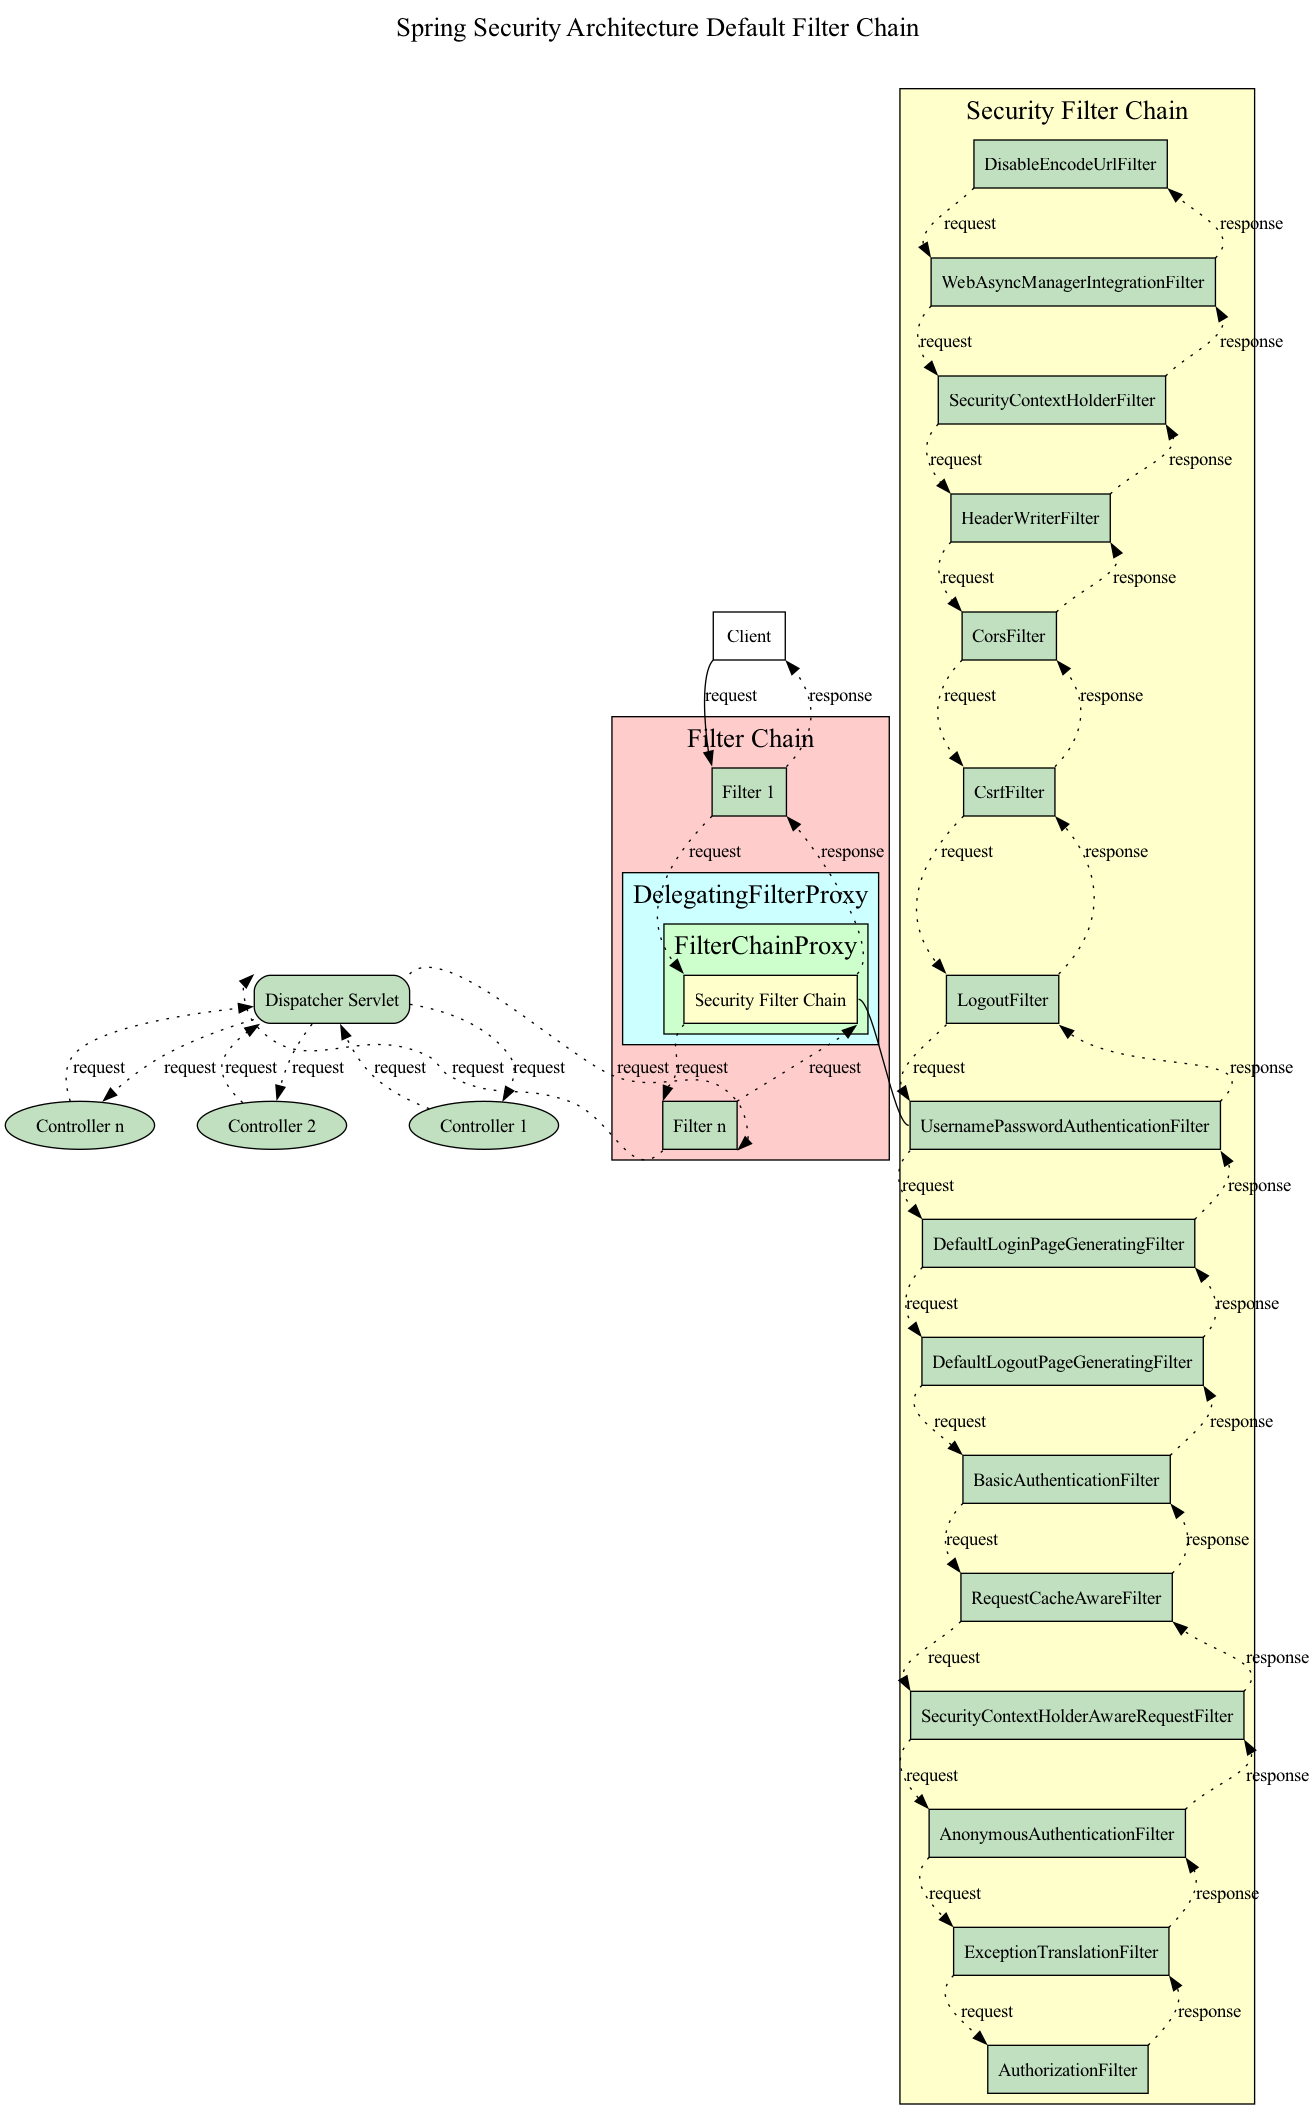

In [5]:
from graphviz import Digraph

# Create a new directed graph with left-to-right direction
dot = Digraph("Spring Security Architecture Default Filter Chain",  graph_attr={'label': 'Spring Security Architecture Default Filter Chain\n\n', 'labelloc': 't', 'fontsize': '20'}, engine="dot")

# Define positions for each node (optional)
positions = {
    'Client': "0,2!",
    'Filter1': "1,2!",
    "SecurityFilterChain": "2,2!",
    'Filtern': "3,2!",
    'DispatcherServlet': "30,13!",
    'Controller1': "31,14!",
    'Controller2': "31,14!",
    'Controllern': "31,14!"
}
# Add nodes outside the cluster
dot.node("Client", "Client", shape="rect", pos=positions['Client'])


# Create a cluster for Filter Chain
with dot.subgraph(name="cluster_filter_chain") as c:
    c.attr(label="Filter Chain", style="filled", fillcolor="#ffcccc")
    c.node("Filter1", "Filter 1", shape="rect", style="filled", fillcolor="#c0e0c0", pos=positions['Filter1'])

    with c.subgraph(name="cluster_delegating_filter_chain_proxy") as d:
        d.attr(label="DelegatingFilterProxy", style="filled", fillcolor="#ccffff")
        
        with d.subgraph(name="cluster_filter_chain_proxy") as e:
            e.attr(label="FilterChainProxy", style="filled", fillcolor="#ccffcc")
            e.node("SecurityFilterChain", "Security Filter Chain", shape="rect", style="filled", fillcolor="#ffffcc", pos=positions['SecurityFilterChain'])   
                
    c.node("Filtern", "Filter n", shape="rect", style="filled", fillcolor="#c0e0c0", pos=positions['Filtern'])   

    c.edge("Filter1:sw", "SecurityFilterChain:nw", label="request", style="dotted")
    c.edge("SecurityFilterChain:ne", "Filter1:se", label="response", style="dotted")
    c.edge("SecurityFilterChain:sw", "Filtern:nw", label="request", style="dotted")
    c.edge("Filtern:ne", "SecurityFilterChain:se", label="request", style="dotted")

defaultFilterChain = ["DisableEncodeUrlFilter", "WebAsyncManagerIntegrationFilter", "SecurityContextHolderFilter", 
                      "HeaderWriterFilter", "CorsFilter", "CsrfFilter", "LogoutFilter", "UsernamePasswordAuthenticationFilter", 
                      "DefaultLoginPageGeneratingFilter", "DefaultLogoutPageGeneratingFilter", "BasicAuthenticationFilter",
                      "RequestCacheAwareFilter", "SecurityContextHolderAwareRequestFilter", "AnonymousAuthenticationFilter",
                      "ExceptionTranslationFilter", "AuthorizationFilter"]

# Create a cluster for Security Filter Chains to illustrate selection
with dot.subgraph(name="cluster_security_filter_chain") as g:
    g.attr(label="Security Filter Chain", style="filled", fillcolor="#ffffcc")
    for securityFilterChain in defaultFilterChain:
        g.node(securityFilterChain, shape="rect", style="filled", fillcolor="#c0e0c0")

    for i in range(len(defaultFilterChain) - 1):
        g.edge(defaultFilterChain[i] + ":sw", defaultFilterChain[i+1] + ":nw", label="request", style="dotted")
        g.edge(defaultFilterChain[i+1] + ":ne", defaultFilterChain[i] + ":se", label="response", style="dotted")

dot.node("DispatcherServlet", "Dispatcher Servlet", style="filled,rounded", fillcolor="#c0e0c0", shape="rect", pos=positions['DispatcherServlet'])
dot.node("Controller1", "Controller 1", style="filled", fillcolor="#c0e0c0", pos=positions['Controller1'])
dot.node("Controller2", "Controller 2", style="filled", fillcolor="#c0e0c0", pos=positions['Controller2'])
dot.node("Controllern", "Controller n", style="filled", fillcolor="#c0e0c0", pos=positions['Controllern'])


# Add edges
dot.edge("Client:sw", "Filter1:nw", label="request")
dot.edge("Filter1:ne", "Client:se", label="response", style="dotted")
dot.edge("Filtern:sw", "DispatcherServlet:nw", label="request", style="dotted")
dot.edge("DispatcherServlet:ne", "Filtern:se", label="request", style="dotted")
dot.edge("DispatcherServlet", "Controller1", label="request", style="dotted")
dot.edge("Controller1", "DispatcherServlet", label="request", style="dotted")
dot.edge("DispatcherServlet", "Controller2", label="request", style="dotted")
dot.edge("Controller2", "DispatcherServlet", label="request", style="dotted")
dot.edge("DispatcherServlet", "Controllern", label="request", style="dotted")
dot.edge("Controllern", "DispatcherServlet", label="request", style="dotted")

# # Add edge from FilterChainProxy to Security Filter Chain 2
dot.edge("SecurityFilterChain:e", "UsernamePasswordAuthenticationFilter:w", dir="none")

# Render the graph
dot.render("./spring_security_architecture_default_filter_chain", format="png", view=False)

Image("./spring_security_architecture_default_filter_chain.png")

## Security Filters

The FilterChainProxy stores the SecurityFilterChain in a list called additionalFilters, a counter named currentPosition is used to manage where along the chain the request is being processed. In the image above, the currentPosition is 3 so the request is being processed in the SecurityContextHolderFilter.

We will focus on

UsernamePasswordAuthenticationFilter
BasicAuthenticationFilter
[Optional] You can read more about the other security filters here:

[Optional] Spring Security Filter
Username Password Authentication Flow

Retrieving Security Context

When an incoming request enters the Security Filter Chain and reaches the SecurityContextHolderFilter it will call the SecurityContextRepository to retrieve any existing SecurityContext associated with the Cookie JSESSIONID.

JSESSIONID is a cookie used to track user sessions. When a user logs in, their authenticated state is represented by an Authentication object, which is encapsulated in a SecurityContext stored in memory by the SecurityContextRepository. For subsequent requests in the same session, this Authentication object is retrieved sparing the user the extra work of re-authenticating.


Since the user hasn’t been authenticated in this session, an empty Security Context is created stored in in the SecurityContextHolder.

The SecurityContextHolder is a thread local store for the SecurityContext, meaning that the SecurityContext and its Authentication object is global to the current request meaning that it can be access anywhere during the request lifecycle and is isolated from other requests.

Getting Redirected to Login Page

When the request reaches the ExceptionTranslationFilter, which redirects unauthenticated requests to the login page.


The login page is a JSP page generated by the DefaultLoginPageGenerating filter.

A JSP page is a server generated page that dynamically creates HTML content to display in a web browser.

Authentication with the UsernamePasswordAuthenticationFilter
When you sign into the login page, it will make a POST request to the /login endpoint with the user’s username and password.

The POST request to the /login endpoint will be intercepted by the UsernamePasswordAuthenticationFilter.


The filter will extract the username and password from the request and created an unauthenticated UsernamePasswordAuthenticationToken(implementation of Authentication) and pass the token to the authenticate method of the AuthenticationManager.

Authentication Architecture
Unimplemented


When an Authentication object is processed by the AuthenticationManager's authenticate method, it delegates the authentication to an appropriate AuthenticationProvider. The AuthenticationProvider extracts the username and password from the Authentication object, retrieves the corresponding UserDetails (which includes the stored password), and encodes the provided password using a PasswordEncoder. The authentication is successful if the encoded password matches the stored password in the UserDetails.

AuthenticationManager: Central interface for handling authentication requests.
AuthenticationProvider: Component that performs the actual authentication by processing credentials.
PasswordEncoder: Tool for encoding and validating passwords securely.
UserDetailsService: Service that loads user-specific data from a data source.
UserDetails: Object representing user information, including username, password, and roles.
The default configuration for Spring Security, the AuthenticationManager is implemented as ProviderManager, the PasswordEncoder is implemented as DelegatingPasswordEncoder and the UserDetailsService is implemented as InMemoryUserDetailsManager.


The ProviderManager will decide which which implementation of AuthenticationProvider to delegate authentication to by looping over all available providers. It selects the provider that supports the UsernamePasswordAuthenticationToken which is the implementation of the Authentication object that is passed from the UsernamePasswordAuthentication filter.


Since the abstract class AbstractDetailsAuthenticationProvider supports UsernamePasswordAuthenticationToken the ProviderManager will delegate authentication to the DaoAuthenticationProvider.


public abstract class AbstractUserDetailsAuthenticationProvider
  implements AuthenticationProvider, InitializingBean, MessageSourceAware {
 ....
  @Override
  public boolean supports(Class<?> authentication) {
    return (UsernamePasswordAuthenticationToken.class.isAssignableFrom(authentication));
  }
  ...
}


We will authenticate the Authentication token encoding the password and compared it with the encoded password in the UserDetails object retrieved from the datastore.


When the request has been authenticated an authenticated Authentication object will be created using the username and authorities from the UserDetails object, for safety consideration we will not store the password.


Once the SecurityContextHolder contains the authenticated Authentication with the proper authorities it has access to the relevant controller.

Subsequent Requests of Authenticated Session

When the response being returned to the client reaches the SecurityContextPersistenceFilter, the SecurityContext is stored by the SecurityContextRepository and then cleared from the SecurityContextHolder. This is important because:

Storing the SecurityContext allows it to be reused for future requests in the same session, eliminating the need for re-authentication.
Clearing the SecurityContextHolder prevents sensitive information from the SecurityContext from leaking to other threads or requests from different sessions.

When a subsequent request is made within the same session, the SecurityContextHolderFilter retrieves the stored authenticated SecurityContext from the SecurityContextRepository using the JSESSIONID.


Once the authenticated Authentication object is loaded into the SecurityContextHolder, the request is granted access to the relevant controller.

Basic Authentication Flow

Consider an incoming request with the following authorization header.

Authorization: Basic <encoded token>

The <encoded token> is the Base64 encoded string of <username>:<password>

Similar to the Username Password Authentication flow, an incoming request reaches the SecurityContextHolderFilter which retrieves the SecurityContext of the current session from SecurityContextRepository, since the user has not previously been authenticated an empty SecurityContext is stored in the SecurityContextHolder.


Since the request contains the Authorization header with the Basic scheme, it will trigger the BasicAuthenticationFilter.


The filter will extract the username and password from the encoded token, create an unauthenticated Authentication token, and delegate it to the ProviderManager to perform authentication, similar to the process used in the Username Password Authentication flow.


Once the request has been authenticated it will have access to the controller.


Similar to the Username Password Authentication when the response reach the SecurityContextHolderFilter, the SecurityContextRepository will store the SecurityContext for subsequent request in the same session and clear the SecurityContext in the SecurityContextHolder.


A subsequent request will have access to the authenticated SecurityContext, eliminating the need for re-authentication.


Drawback to the Username Password and Basic Authentication flow
We will no longer use the default security filter chain because it is tightly coupled with the Spring MVC framework, which assumes a server-generated frontend closely integrated with backend REST APIs. This setup relies on server-managed sessions (JSESSIONID) to maintain authentication state, making it unsuitable for hosting REST APIs in a modern web application where the backend is decoupled from the frontend, particularly when using frameworks like React or Vue.

Another significant drawback of the default security filter chain emerges when scaling the application across multiple servers. Since JSESSIONID is stored in memory on a single server, a user who logs in on one server might be routed to another server by a load balancer. If the session is managed in-memory, the new server won’t recognize the user's session, causing authentication failures. This issue highlights the limitations of relying on server-managed sessions in a distributed environment, underscoring the need for a more stateless, scalable approach to authentication.

# Username Email Password Authentication in Spring Security
https://medium.com/stackademic/username-email-password-authentication-in-spring-security-5752aaf10652

Motivation
I want the user to sign up by providing their username, email and password. And after successful sign up the user can authenticate into our application using either their username and password or their email and password.

Strategies
Plaintext Authentication
The user provides their username and password during signup, our application saves the users credential in plaintext.


When a user attempts to authenticate, they provide their username and password. The application then verifies the user by directly comparing the provided password with the one stored in the database. The issue with this approach is that if the username and password in the database are ever leaked to a malicious third party, the attacker can use the leaked credentials to sign in as the user, thereby compromising the user’s account.

Hashing Authentication

Instead of storing plaintext passwords in the database, the application stores hashed passwords. This way, if a malicious third party obtains a copy of the hashed passwords, they do not have access to the original unhashed passwords and cannot use the hashed passwords to sign in. This adds a layer of security, making it much harder for attackers to compromise user accounts.

Hash and Salting Authentication

Let’s add an extra level of security by generating a random string called a salt, and creating a hashed password using both the original password and the salt. This makes it significantly harder for a malicious third party to crack the password, even if they obtain the hashed version, as they would also need the unique salt.

Because of the added security it provides against password attacks, we will choose hash and salting authentication as our authentication strategy.

Username Email Password Authentication Flow

Considerations:

We will be using the BCryptPasswordEncoder library for encoding and decoding passwords, which will automatically handle the hashing and salting of user passwords. This means we don’t need to manage hashing, salt generation, or storage.
To whitelist endpoints, we define the endpoints that we want to whitelist in HttpSecurity within the security configuration.
@Bean
public SecurityFilterChain securityFilterChain(HttpSecurity http) {
  http
    .authorizeHttpRequests(auth -> auth
      .requestMatchers("swagger-ui/**", "/signup").permitAll()  // Whitelist signup endpoint
      .anyRequest().authenticated();
  return http.build();
}
During application startup, the AuthorizationManager is created with the list of whitelisted endpoints. When an unauthenticated request reaches the AuthorizationFilter, it will call the AuthorizationManager to determine if the request has access by checking if the URL of the request matches the whitelisted endpoints. If the request matches one of the whitelisted endpoints, access is granted.


Database Setup
We will be using MongoDB as our database. For setting up MongoDB refer to the following:

How to Perform CRUD Operations in Java Applications with MongoDB
Our database will store the Users object that implements the UserDetails interface in the users collection. The purpose of our users object is to store the username, email and encoded password for authentication. The access and refresh tokens will be used later when we set up JWT authentication. Lets create the following Users.java class.

@Document(collection = "users")
@Data
public class User implements UserDetails {
    @Id
    private String id;
    private String username;
    private String email;
    private String password;
    private String accessToken;
    private String refreshToken;
    private Set<GrantedAuthority> authorities;
    private boolean accountNonExpired;
    private boolean accountNonLocked;
    private boolean credentialsNonExpired;
    private boolean enabled;

    @Override
    public Set<GrantedAuthority> getAuthorities() {
        return this.authorities;
    }

    @Override
    public boolean isAccountNonExpired() {
        return this.accountNonExpired;
    }

    @Override
    public boolean isAccountNonLocked() {
        return this.accountNonLocked;
    }

    @Override
    public boolean isCredentialsNonExpired() {
        return this.credentialsNonExpired;
    }

    @Override
    public boolean isEnabled() {
        return this.enabled;
    }
}
Now lets create a UserRepository.java class.


public interface UserRepository extends MongoRepository<User, String>, CustomUserRepository {

    // Custom query to find employees by firstname
    @Query("{ 'username' : ?0 }")
    Optional<User> findByUsername(String username);

    @Query("{ 'email' : ?0 }")
    Optional<User> findByEmail(String email);

}
CustomUserRepository.java

public interface CustomUserRepository {
    User updateUser(String id, User user);
}
CustomUserRepositoryImpl.java

@Repository
public class CustomUserRepositoryImpl implements CustomUserRepository {

    @Autowired
    private MongoTemplate mongoTemplate;

    @Override
    public User updateUser(String id, User user) {
        Query query = new Query(Criteria.where("id").is(id));
        Update update = new Update()
                .set("username", user.getUsername())
                .set("email", user.getEmail())
                .set("password", user.getPassword())
                .set("refreshToken", user.getRefreshToken())
                .set("authorities", user.getAuthorities())
                .set("accountNonExpired", user.isAccountNonExpired())
                .set("accountNonLocked", user.isAccountNonLocked())
                .set("credentialsNonExpired", user.isCredentialsNonExpired())
                .set("enabled", user.isEnabled());

        return mongoTemplate.findAndModify(
                query,
                update,
                FindAndModifyOptions.options().returnNew(true),
                User.class);
    }
}
Lets create a UserService.java class which implements the UserDetailsService.java interface.

@Service
public class UserService implements UserDetailsService {

   @Autowired
   private UserRepository userRepository;

    @Autowired
    private PasswordEncoder passwordEncoder;

    public Optional<User> getById(String id) {
        return userRepository.findById(id);
    }

    public List<User> getUsersByIds(List<String> ids) {
        return userRepository.findAllById(ids);
    }

    public Optional<User> getByUsername(String username) {
        return userRepository.findByUsername(username);
    }

    @Override
    public UserDetails loadUserByUsername(String username) throws UsernameNotFoundException {
        return getByUsername(username).orElseThrow(() -> new UsernameNotFoundException("User not found"));
    }

    public Optional<User> getByEmail(String email) {
        return userRepository.findByEmail(email);
    }

    public boolean existsByUsername(String username) {
        return userRepository.findByUsername(username).isPresent();
    }

    public boolean existsByEmail(String email) {
        return userRepository.findByEmail(email).isPresent();
    }

    public User saveUser(User user) {
        user.setPassword(passwordEncoder.encode(user.getPassword()));
        return userRepository.save(user);
    }
}
Signup Process
The reason we need to whitelist the signup endpoint is that we don’t have an identity stored in the database for a new user, so authentication can’t be performed. By whitelisting the signup endpoint, we allow new users to create an account without requiring prior authentication.

To whitelist the signup endpoint add the following to SecurityConfig.java.

@Bean
public SecurityFilterChain securityFilterChain(HttpSecurity http) {
  http
    .authorizeHttpRequests(auth -> auth
      .requestMatchers("swagger-ui/**", "/signup").permitAll()  // Whitelist signup endpoint
      .anyRequest().authenticated();
  return http.build();
}
You can append permitAll() to the endpoints that you want to whitelist, and append authenticated() to the endpoints that you want to protect.

We are whitelisting swagger-ui/** to allow access to the swagger user interface which is similar to Postman to call our endpoint.

Lets create our signup and signin handler by adding AuthenticationController.java.

@RequestMapping("/auth")
@RestController
public class AuthenticationController {

    @Autowired
    private UserService userService;

    @Autowired
    AuthenticationManager authenticationManager;

    @PostMapping("/signup")
    public ResponseEntity<?> registerUser(@RequestBody SignupRequest signupRequest) {
        if (userService.existsByUsername(signupRequest.getUsername())) {
            return ResponseEntity
                    .badRequest()
                    .body("Error: Username is already taken!");
        }

        if (userService.existsByEmail(signupRequest.getEmail())) {
            return ResponseEntity
                    .badRequest()
                    .body("Error: Email is already in use!");
        }

        // Create new user
        User user = new User();
        user.setUsername(signupRequest.getUsername());
        user.setEmail(signupRequest.getEmail());
        user.setPassword(signupRequest.getPassword());
        user.setAuthorities(Collections.singleton(new SimpleGrantedAuthority("ROLE_USER")));
        user.setAccountNonExpired(true);
        user.setAccountNonLocked(true);
        user.setCredentialsNonExpired(true);
        user.setEnabled(true);

        User savedUser = userService.saveUser(user);

        // Return success response with email, username, and userid
        return ResponseEntity.ok(new SignupResponse(savedUser.getId(), savedUser.getUsername(), savedUser.getEmail()));
    }

    @PostMapping("/signin")
    public ResponseEntity<?> authenticateUser(@RequestBody SigninRequest signinRequest) {

        return ResponseEntity.ok("Successful Authentication");
    }

}
SignupRequest.java

@Data
public class SignupRequest {
    @NotBlank
    private String username;
    @NotBlank
    @Email
    private String email;
    @NotBlank
    private String password;
}
SigninRequest.java

@Data
public class SigninRequest {

    private String username;

    @Email
    private String email;

    @NotBlank
    private String password;
}
Our signup handler will save the user’s credentials to database.

Signin Process
We will perform authentication on our signin endpoint, /signin, which will invoke the custom UsernameEmailPasswordAuthenticationFilter to authenticate the user. This filter will first attempt to authenticate using the username and password; if the username is not present, it will then attempt to authenticate using the user's email and password. This filter will follow the same authentication architecture as the UsernamePasswordAuthenticationFilter discussed in

Spring Security Default Security Filter Chain

We have already provided implementations for UserDetailsService (UserService) and PasswordEncoder (BCryptPasswordEncoder). Next, we will implement the custom filter UsernameEmailPasswordAuthenticationFilter and the custom AuthenticationProvider (UsernameEmailPasswordAuthenticationProvider).

The UsernameEmailPasswordAuthenticationFilter.java will intercept a signin request, check whether the request contains either a username or email and a password, and then create a UsernameEmailPasswordAuthenticationToken. The boolean parameter withUsername in this token is determined based on whether a username or email is provided in the request. The filter then sends the authentication token to the AuthenticationManager for authentication.

@Component
public class UsernameEmailPasswordAuthenticationFilter extends UsernamePasswordAuthenticationFilter {

    @Autowired
    private AuthenticationController authenticationController;
    public UsernameEmailPasswordAuthenticationFilter(AuthenticationManager authenticationManager) {
        super(authenticationManager);
        setFilterProcessesUrl(SIGNIN_URL);
    }

    @Override
    public Authentication attemptAuthentication(HttpServletRequest request, HttpServletResponse response) {
        SigninRequest signinRequest = extractSigninRequest(request);

        String username = signinRequest.getUsername();
        String email = signinRequest.getEmail();
        String password = signinRequest.getPassword();

        if ((username == null || username.isEmpty()) && (email == null || email.isEmpty())) {
            throw new AuthenticationServiceException("Authentication failed: need both username or email.");
        }

        if (password == null || password.isEmpty()) {
            throw new AuthenticationServiceException("Authentication failed: need password.");
        }

        boolean withUsername = (username != null && !username.isEmpty());
        String principal = withUsername ? username : email;

        UsernameEmailPasswordAuthenticationToken authRequest = new UsernameEmailPasswordAuthenticationToken(principal, password, withUsername);
        return this.getAuthenticationManager().authenticate(authRequest);
    }

    @Override
    protected void successfulAuthentication(HttpServletRequest request, HttpServletResponse response, FilterChain chain, Authentication authResult) throws IOException, ServletException {
        SecurityContextHolder.getContext().setAuthentication(authResult);

        ResponseEntity<?> responseEntity = authenticationController.authenticateUser(null, response);

        response.setContentType(CONTENT_TYPE);
        response.setStatus(responseEntity.getStatusCode().value());
        response.getWriter().write(new ObjectMapper().writeValueAsString(responseEntity.getBody()));
    }

    @Override
    protected void unsuccessfulAuthentication(HttpServletRequest request, HttpServletResponse response, AuthenticationException failed) throws IOException, ServletException {
        ResponseEntity<String> responseEntity = ResponseEntity
                .status(HttpStatus.UNAUTHORIZED)
                .body("Error: " + failed.getMessage());

        response.setContentType(CONTENT_TYPE);
        response.setStatus(responseEntity.getStatusCode().value());
        response.getWriter().write(new ObjectMapper().writeValueAsString(responseEntity.getBody()));
    }

    private SigninRequest extractSigninRequest(HttpServletRequest request) {
        try {
            ObjectMapper objectMapper = new ObjectMapper();
            return objectMapper.readValue(request.getInputStream(), SigninRequest.class);
        } catch (IOException e) {
            throw new AuthenticationServiceException("Authentication failed: unable to read request body.", e);
        }
    }
}
UsernameEmailPasswordAuthenticationToken.java

public class UsernameEmailPasswordAuthenticationToken extends UsernamePasswordAuthenticationToken {

    @Getter
    private final String id;
    private final Boolean withUsername;

    public UsernameEmailPasswordAuthenticationToken(Object principal, Object credentials, boolean withUsername) {
        super(principal, credentials);
        this.id = null;
        this.withUsername = withUsername;
    }

    public UsernameEmailPasswordAuthenticationToken(String id, Object principal, Collection<? extends GrantedAuthority> authorities) {
        super(principal, null, authorities);
        this.id = id;
        this.withUsername = null;
    }

    public boolean isWithUsername() {
        return withUsername;
    }

}
The UsernameEmailPasswordAuthenticationProvider.java will be the selected implementation of AuthenticationProvider because it supports the UsernameEmailPasswordAuthenticationToken. Based on the value of withUsername, it will retrieve the User from the database using either the username or email. It will then use the PasswordEncoder to compare the provided password with the stored hashed password. If the credentials are valid, the user is authenticated.

@Component
public class UsernameEmailPasswordAuthenticationProvider implements AuthenticationProvider {

    @Autowired
    private UserService userService;

    @Autowired
    private PasswordEncoder passwordEncoder;

    /**
     * If username and password are provided will check if the user and password are valid
     * If email and password are provided will check if the email and password are valid
     */
    @Override
    public Authentication authenticate(Authentication authentication) throws AuthenticationException {
        UsernameEmailPasswordAuthenticationToken authRequest = (UsernameEmailPasswordAuthenticationToken) authentication;
        String principal = (String) authRequest.getPrincipal();
        String credentials = (String) authRequest.getCredentials();
        boolean withUsername = authRequest.isWithUsername();

        User user;

        if (withUsername) {
            user = userService.getByUsername(principal).orElseThrow(
                    () -> new AuthenticationServiceException("Invalid username/email or password"));
        } else {
            user = userService.getByEmail(principal).orElseThrow(
                    () -> new AuthenticationServiceException("Invalid username/email or password"));
        }

        if (!passwordEncoder.matches(credentials, user.getPassword())) {
            throw new AuthenticationServiceException("Invalid username/email or password");
        }
        return new UsernameEmailPasswordAuthenticationToken(user.getId(), user.getUsername(), user.getAuthorities());
    }

    /**
     * The AuthenticationManager will choose which AuthenticationProvider to use based if the provider supports the
     * implementation of the Authentication token.
     * In this case, the UsernameEmailPasswordAuthenticationToken is supported. And the AuthorizationManager will
     * use this provider to authenticate the user.
     */
    @Override
    public boolean supports(Class<?> authentication) {
        return UsernameEmailPasswordAuthenticationToken.class.isAssignableFrom(authentication);
    }
}
Now lets wire these components together in SecurityConfig.java.

@Configuration
@EnableWebSecurity
public class SecurityConfig {

  @Bean
  public AuthenticationProvider authenticationProvider() {
    return new UsernameEmailPasswordAuthenticationProvider();
  }

  @Bean
  public AuthenticationManager authenticationManager(AuthenticationConfiguration authConfig) throws Exception {
    return authConfig.getAuthenticationManager();
  }

  @Bean
  public PasswordEncoder passwordEncoder() {
    return new BCryptPasswordEncoder();
  }

  @Bean
  public UsernameEmailPasswordAuthenticationFilter usernameEmailPasswordAuthenticationFilter(AuthenticationManager authenticationManager) {
    return new UsernameEmailPasswordAuthenticationFilter(authenticationManager);
  }

  @Bean
  public SecurityFilterChain securityFilterChain(HttpSecurity http,
                                                 UsernameEmailPasswordAuthenticationFilter usernameEmailPasswordAuthenticationFilter) throws Exception {
    http
            .csrf(csrf -> csrf.disable())  // Disable CSRF protection
            .authorizeHttpRequests(auth -> auth
                    .requestMatchers("swagger-ui/**", "/signup").permitAll()  // Whitelist signup endpoint
                    .anyRequest().authenticated()  // All other endpoints require authentication
            )
            .addFilterAt(usernameEmailPasswordAuthenticationFilter, UsernamePasswordAuthenticationFilter.class);
    return http.build();
  }
}
The .addFilterAt method allows us to replace the UsernamePasswordAuthenticationFilter filter with UsernameEmailPasswordAuthenticationFilter filter in the security filter chain.

As a result, our security filter chain will look like this:



# JWT Authentication in Spring Security
https://medium.com/stackademic/jwt-authentication-in-spring-security-0061d82ddf12

In this architecture:

The user signs in to the application.
Upon successful authentication, the application issues an access token and a refresh token to the user. The refresh token has a longer expiry period than the access token.
The user uses the access token to make requests to the application for protected resources.
When the access token expires, any requests made by the user to access protected resources with the expired token will fail.
The user makes a renewal request with the refresh token. The application responds with a new access token with a new expiry date.
Why Use Access and Refresh Token Architecture?
Using access and refresh tokens improves the user experience by reducing the friction of repeated login prompts. Users can continue making requests using the access token until it expires. Once the access token expires, the refresh token can be used to automatically obtain a new access token without requiring any manual action from the user.

Why Not Just Use the Access Token?

The two-token approach (access and refresh tokens) improves security by addressing the risks associated with access tokens. Since the access token is sent over the network with each request to protected resources, it is at a higher risk of being stolen by a malicious third party. To minimize potential damage, the access token is given a shorter expiry period, ensuring that even if it is compromised, the stolen token will only be valid for a short time.

In contrast, the refresh token has a longer lifespan because it is only used to renew access tokens and is not exposed to the same level of risk since it is not transmitted with every request.

JWT Authentication Flow
The user signs in with their credential.
Once signed in our application will create an access token and refresh token stores the tokens in database and return the tokens to the user.
The user stores the refresh token in its Cookies, and use the access token to make requests to protected resources.
When the access token expires, it will make a request to the refresh endpoint with the refresh token.
The refresh endpoint will generate a new access token, stores the new token in database and return back to the user.
When the user wants to logout, it calls the signout endpoint with the refresh token which will remove both tokens from database, and remove the refresh token from the user’s Cookies.

Discussion
We’ve established that JWT is a self-contained token that can be validated using the secret key and the token itself. So why do we need to store the tokens in a database and compare the stored token with the token in the request?

The reason is to eliminate stale tokens that become invalid due to actions like logging out or updating the user’s authorities. In these cases, we update the token in the database. If we only validated the token by comparing the hashed header and payload with the signature, stale tokens would still appear valid. However, by checking the token against the stored version in the database, we can ensure that only the most current and valid tokens are accepted.

You might then wonder, why not just store opaque tokens, like JSESSIONID, in a distributed cache and use those for validation? The issue with this approach is that if a malicious party floods our system with requests using fake opaque tokens, our database (or distributed cache) could become overwhelmed with validation queries.

In contrast, using JWTs allows us to verify the token’s validity on the server side without querying the database because JWTs are signed with our secret key. This means we can immediately reject invalid tokens without burdening the database.

We are making a tradeoff here, while we eliminate stale tokens by making extra queries to the database to ensure the tokens are up-to-date, the overall number of queries will likely be lower than if we were using opaque tokens, which would require database queries for every invalid token.

JWT Setup
Add the following dependencies to pom.xml

  <!-- JWT authentication -->
  <dependency>
   <groupId>io.jsonwebtoken</groupId>
   <artifactId>jjwt-api</artifactId>
   <version>0.12.6</version>
  </dependency>
  <dependency>
   <groupId>io.jsonwebtoken</groupId>
   <artifactId>jjwt-impl</artifactId>
   <version>0.12.6</version>
  </dependency>
  <dependency>
   <groupId>io.jsonwebtoken</groupId>
   <artifactId>jjwt-jackson</artifactId>
   <version>0.12.6</version>
  </dependency>
Add the JwtUtils.java file.

@Component
public class JwtUtils {
    public static final ExpirationTime ACCESS_TOKEN_EXPIRATION_TIME = new ExpirationTime(5, 5, 1, 0);
    public static final ExpirationTime REFRESH_TOKEN_EXPIRATION_TIME = new ExpirationTime(30, 5, 5, 0);
    public static final String TOKEN_TYPE = "token_type";
    private final SecretKey accessSigningKey;
    private final SecretKey refreshSigningKey;

    private final UserService userService;

    @Autowired
    public JwtUtils(String accessSecretKey, String refreshSecretKey, UserService userService) {
        this.accessSigningKey = Keys.hmacShaKeyFor(accessSecretKey.getBytes());
        this.refreshSigningKey = Keys.hmacShaKeyFor(refreshSecretKey.getBytes());
        this.userService = userService;
    }

    /**
     * Generates a JWT token
     *
     * @param authentication UsernameEmailPasswordAuthenticationToken
     * @param tokenType      TokenType
     * @return JWT token
     */
    public String generateToken(UsernameEmailPasswordAuthenticationToken authentication, TokenType tokenType) {
        return generateToken(
                authentication.getId(),
                authentication.getName(),
                tokenType
        );
    }

    /**
     * Generates a JWT token
     *
     * @param id       User ID
     * @param userName User name
     * @param tokenType TokenType
     * @return JWT token
     */
   public String generateToken(String id, String userName, TokenType tokenType) {
        JwtBuilder jwts = Jwts.builder()
                .id(id)
                .subject(userName)
                .issuedAt(new Date(System.currentTimeMillis()));

        /**
         * If the token type is ACCESS_TOKEN, then set the expiration time to ACCESS_TOKEN_EXPIRATION_TIME and sign with the accessSigningKey
         * Otherwise, set the expiration time to REFRESH_TOKEN_EXPIRATION_TIME and sign with the refreshSigningKey
         */
        if (tokenType.equals(ACCESS_TOKEN)) {
            jwts
                    .claims(Map.of(TOKEN_TYPE, ACCESS_TOKEN))
                    .expiration(new Date(System.currentTimeMillis() + ACCESS_TOKEN_EXPIRATION_TIME.toMillis()))
                    .signWith(accessSigningKey);
        } else {
            jwts
                    .claims(Map.of(TOKEN_TYPE, REFRESH_TOKEN))
                    .expiration(new Date(System.currentTimeMillis() + REFRESH_TOKEN_EXPIRATION_TIME.toMillis()))
                    .signWith(refreshSigningKey);
        }
        return jwts.compact();
    }

    /**
     * Validates the JWT token
     *
     * @param token    JWT token
     * @param tokenType TokenType
     * @return UsernameEmailPasswordAuthenticationToken
     */
    public UsernameEmailPasswordAuthenticationToken validateToken(String token, TokenType tokenType) {

        /**
         * If the token type is ACCESS_TOKEN, then verify the token with the accessSigningKey
         * Otherwise, verify the token with the refreshSigningKey because we sign the different token types with different
         * signing keys.
         */
        Claims jwtPayload = Jwts.parser()
                .verifyWith(
                        tokenType.equals(ACCESS_TOKEN) ? accessSigningKey : refreshSigningKey
                )
                .build()
                .parseSignedClaims(token)
                .getPayload();
        /**
         * The `parseSignedClaims` method is where we validate the jwt token. It checks
         * - if encrypt(base64(header) + "." + base64(payload), secretKey) == signature
         * - if the token is expired else throw JwtException
         */

        /**
         * Since we have 2 types of tokens(access, refresh), we want to check if the token type is valid.
         * The refresh token is used for the /auth/refresh and /auth/logout endpoint,
         * and the access token is used for all other endpoints. If validateToken is called through the /auth/refresh or
         * /auth/logout endpoint the parameter TokenType will be REFRESH_TOKEN, and the token type in the payload will be REFRESH_TOKEN
         * otherwise, the parameter TokenType will be ACCESS_TOKEN, and the token type in the payload will be ACCESS_TOKEN.
         */
        if (!jwtPayload.get(TOKEN_TYPE).equals(tokenType.name())) {
            throw new IllegalArgumentException("Invalid JWT token type");
        }

        // Retrieves the user from the database
        User user = userService.getById(jwtPayload.getId()).orElseThrow(
                () ->
                        new IllegalArgumentException("User not found"));

        /**
         * If stored in database does not equal the token from request, then throw an exception.
         * Because
         * - During logout we flush both the access and refresh token from database, or when we generate a new access token
         *  during refresh
         * - The token will still be valid if
         * we use parseSignedClaims to check if the encrypted header + payload == signature, or if the token is expired.
         * - But in terms of our business logic it is invalid, so we need to check if the token from the request is equal
         * to the token stored in the database
         */
        String StoredToken = tokenType.equals(ACCESS_TOKEN) ? user.getAccessToken() : user.getRefreshToken();
        if (StoredToken == null || !StoredToken.equals(token)) {
            throw new JwtException("JWT token does not exist");
        }

        /**
         * return verified Authentication object
         */
        return new UsernameEmailPasswordAuthenticationToken(jwtPayload.getId(), jwtPayload.getSubject(), user.getAuthorities());
    }

}
Add the following model classes.

ExpirationTime.java

@Getter
public class ExpirationTime {
    // Getters
    private final int days;
    private final int hours;
    private final int minutes;
    private final int seconds;

    public ExpirationTime(int days, int hours, int minutes, int seconds) {
        this.days = days;
        this.hours = hours;
        this.minutes = minutes;
        this.seconds = seconds;
    }

    public long toSeconds() {
        return ((days * 24L + hours) * 60 + minutes) * 60 + seconds;
    }

    public long toMillis() {
        return toSeconds() * 1000;
    }
}
SigninRequest.java

@Data
public class SigninRequest {
    private String username;
    @Email
    private String email;
    @NotBlank
    private String password;
}
AccessTokenResponse.java

@Data
public class AccessTokenResponse {
    private String accessToken;
    private long expiresIn;

    public AccessTokenResponse(String accessToken, long expiresIn) {
        this.accessToken = accessToken;
        this.expiresIn = expiresIn;
    }
}
TokenType.java

public enum TokenType {
    ACCESS_TOKEN("access_token"),
    REFRESH_TOKEN("refresh_token");

    private final String value;

    TokenType(String value) {
        this.value = value;
    }

    public String getValue() {
        return value;
    }
}
Repository Setup
Add the following fields to User.java if you haven’t

 private String accessToken;
 private String refreshToken;
Add the following methods to CustomUserRepository.java

    void updateTokens(String id, String accessToken, String refreshToken);
    void updateAccessToken(String id, String accessToken);
    void deleteTokens(String id);
and to CustomUserRepositoryImpl.java

    @Override
    public void updateTokens(String id, String accessToken, String refreshToken) {
        Query query = new Query(Criteria.where("id").is(id));
        Update update = new Update()
                .set("accessToken", accessToken)
                .set("refreshToken", refreshToken);
        mongoTemplate.updateFirst(query, update, User.class);
    }

    @Override
    public void updateAccessToken(String id, String accessToken) {
        Query query = new Query(Criteria.where("id").is(id));
        Update update = new Update()
                .set("accessToken", accessToken);
        mongoTemplate.updateFirst(query, update, User.class);
    }

    @Override
    public void deleteTokens(String id) {
        Query query = new Query(Criteria.where("id").is(id));
        Update update = new Update()
                .unset("accessToken")
                .unset("refreshToken");
        mongoTemplate.updateFirst(query, update, User.class);
    }
Add the following method it UserService.java if you haven’t.

    public void updateTokens(String id, String accessToken, String refreshToken) {
        userRepository.updateTokens(id, accessToken, refreshToken);
    }

    public void updateAccessToken(String id, String accessToken) {
        userRepository.updateAccessToken(id, accessToken);
    }

    public void deleteTokens(String id) {
        userRepository.deleteTokens(id);
    }
Security Filter Chain Setup
Add the file JwtAuthenticationFilter.java


public class JwtAuthenticationFilter extends OncePerRequestFilter {
    private static final String AUTHORIZATION = "Authorization";
    private static final String BEARER = "Bearer";
    private static final String REFRESH_COOKIE = "refresh-token";
    private static final String ACCESS_COOKIE = "access-token";
    private static final Set<String> REFRESH_COOKIE_URL = Set.of("/auth/signout", "/auth/signout");


    private final JwtUtils jwtUtils;
    public JwtAuthenticationFilter(JwtUtils jwtUtils) {
        this.jwtUtils = jwtUtils;
    }

    /**
        * Filters the request and validates the JWT token
        *
        * @param request HTTP request
        * @param response HTTP response
        * @param filterChain Filter chain
        * @throws ServletException
        * @throws IOException
     */
    @Override
    protected void doFilterInternal(@NonNull HttpServletRequest request,
                                    @NonNull HttpServletResponse response,
                                    @NonNull FilterChain filterChain) throws ServletException, IOException {

        try {
            /**
             * If the request url is whitelisted, then no need to validate the JWT token
             */
            if (isWhitelistedOrAuthenticated(request)) {
                filterChain.doFilter(request, response);
                return;
            }

            /**
             * For /refresh and /logout we expect the refresh token,
             *  for all other urls we expect the access token.
             */
            boolean isRefreshCookieUrl = REFRESH_COOKIE_URL.contains(request.getRequestURI());
            TokenType tokenType = isRefreshCookieUrl ? TokenType.REFRESH_TOKEN : TokenType.ACCESS_TOKEN;

            String token = getJwtFromRequest(request, isRefreshCookieUrl);

            UsernameEmailPasswordAuthenticationToken authentication = jwtUtils.validateToken(token, tokenType);

            /**
             * Store the authenticated authentication object in the security context
             * so userId, authorities can be used by downstream components, e.g. controllers, services, etc.
             */
            if (getContext().getAuthentication() == null) {
                getContext().setAuthentication(authentication);
            }

            filterChain.doFilter(request, response);
        } catch (AuthenticationException | JwtException failed) {
            handleUnsuccessfulAuthentication(request, response, failed);
        }
    }

    /**
        * Handles unsuccessful authentication
        *
        * @param request HTTP request
        * @param response HTTP response
        * @param failed Authentication exception
        * @throws IOException
     */
    private void handleUnsuccessfulAuthentication(HttpServletRequest request, HttpServletResponse response, RuntimeException failed) throws IOException {
        ResponseEntity<String> responseEntity = ResponseEntity
                .status(HttpStatus.UNAUTHORIZED)
                .body("Error: " + failed.getMessage());

        response.setContentType("application/json");
        response.setStatus(responseEntity.getStatusCode().value());
        response.getWriter().write(new ObjectMapper().writeValueAsString(responseEntity.getBody()));
    }

        /**
            * Extracts JWT token from the request
            *
            * @param request HTTP request
            * @return JWT token
         */
    private String getJwtFromRequest(HttpServletRequest request, boolean isRefreshCookieUrl) {
        Cookie[] cookies = request.getCookies();

        /**
         * If the request URL is a refresh token URL, then extract the refresh-token from the cookie
         */
        if (isRefreshCookieUrl) {
            if (cookies != null) {
                return Arrays.stream(cookies)
                        .filter(cookie -> REFRESH_COOKIE.equals(cookie.getName()))
                        .map(Cookie::getValue)
                        .findFirst()
                        .orElseThrow(() -> new JwtException("Refresh token is missing"));
            }
        }

        /**
         * For all other url extract the access token from the Authorization header or the access-token cookie
         */
        String bearerToken = request.getHeader(AUTHORIZATION);
        if (bearerToken != null && bearerToken.startsWith(BEARER + " ")) {
            return bearerToken.substring(7);
        }

        if (cookies != null) {
            return Arrays.stream(cookies)
                    .filter(cookie -> ACCESS_COOKIE.equals(cookie.getName()))
                    .map(Cookie::getValue)
                    .findFirst()
                    .orElseThrow(() -> new JwtException("Access token is missing"));
        }

        throw new JwtException("JWT token is missing");
    }

    /**
        * Checks if the request URL is whitelisted
        *
        * @param request HTTP request
        * @return true if the request URL is whitelisted, false otherwise
     */
    private boolean isWhitelistedOrAuthenticated(HttpServletRequest request) {
        String requestURI = request.getRequestURI();
        Authentication authentication = getContext().getAuthentication();
        if (authentication != null && authentication.isAuthenticated()) {
            return true;
        }

        AntPathMatcher pathMatcher = new AntPathMatcher();
        boolean isWhitelistedURL = Stream.of(SecurityConfig.WHITE_LIST_URL)
                .anyMatch(pattern -> pathMatcher.match(pattern, requestURI));
        return isWhitelistedURL;
    }
}
The isWhitelistedOrAuthenticated function tells us that the filter won’t be handling requests that is for a whitelist url or request that is authenticated. All other requests requires a JWT token.

Modify to SecurityConfig.java

 public static final String[] WHITE_LIST_URL = {
          "/public/**",
          "/swagger-ui/**",         // Swagger UI
          "/v3/api-docs/**",         // Swagger API docs
          "/auth/signup",            // Signup endpoint
 };
  
  @Bean  
  public JwtUtils jwtUtils(@Value("${JWT_ACCESS_SIGNING_KEY}") String accessSigningKey,
                           @Value("${JWT_REFRESH_SIGNING_KEY}") String refreshSigningKey,
                           UserService userService) {
    return new JwtUtils(accessSigningKey, refreshSigningKey, userService);
  }

  @Bean
  public JwtAuthenticationFilter jwtAuthenticationFilter(JwtUtils jwtUtils) {
    return new JwtAuthenticationFilter(jwtUtils);
  }

  @Bean
  public SecurityFilterChain securityFilterChain(HttpSecurity http,
                                                 JwtAuthenticationFilter jwtAuthenticationFilter,
                                                 UsernameEmailPasswordAuthenticationFilter usernameEmailPasswordAuthenticationFilter) throws Exception {
    http
            .csrf(csrf -> csrf.disable())  // Disable CSRF protection
            .authorizeHttpRequests(auth -> auth
                    .requestMatchers(WHITE_LIST_URL).permitAll()  // Whitelist signup endpoint
                    .anyRequest().authenticated()  // All other endpoints require authentication
            )
            .sessionManagement(session -> session
                    .sessionCreationPolicy(SessionCreationPolicy.STATELESS)  // Stateless session management
            )
            .authenticationProvider(authenticationProvider())  // Register custom authentication provider
            .addFilterAt(usernameEmailPasswordAuthenticationFilter, UsernamePasswordAuthenticationFilter.class)
            .addFilterAfter(jwtAuthenticationFilter, UsernamePasswordAuthenticationFilter.class);
    return http.build();
  }
When we update our session creation strategy to STATELESS , our application won’t be using JSESSIONID to track sessions.

@Value(“${JWT_ACCESS_SIGNING_KEY}”) and @Value(“${JWT_REFRESH_SIGNING_KEY}”) tells our application to fetch these values from the environmental variable JWT_ACCESS_SIGNING_KEY and JWT_REFRESH_SIGNING_KEY .

.addFilterAfter tells application to add the JWTAuthenticationFilter after the UsernamePasswordAuthenticationFilter.

Updating Authentication Endpoints
Update AuthenticationController.java

    @Autowired
    private JwtUtils jwtUtils;

    /**
     * When the username/email and password are validated during signin, an access token and refresh token are returned
     * to the user. The access token is used to authenticate the user for a short period of time, so it is passed back to
     * user in the response body along with the expiry time.
     * While the refresh token are longer lived and are stored in an HTTP-only cookie on the user's browser.
     */
    @PostMapping("/auth/signin")
    public ResponseEntity<?> authenticateUser(@RequestBody SigninRequest signinRequest, HttpServletResponse response) {
        /** The reason for storing the authentication object in the SecurityContextHolder because SecurityContextHolder is thread local
         * store meaning that our authentication object is global to the thread. You can access the authentication object from
         * anywhere in the application without worrying about leaking the authentication object to other threads. Because while
         * SecurityContextHolder is global to the thread, it provides isolation because the authentication object isolated to
         * the thread. By thread, we mean the request thread that is processing the request.
         * We stored the userId, username, email, and authorities in the authentication object, which means we can
         * access the user's information from anywhere in the application.
         */
        UsernameEmailPasswordAuthenticationToken authentication = (UsernameEmailPasswordAuthenticationToken) SecurityContextHolder.getContext().getAuthentication();

        String accessToken = jwtUtils.generateToken(authentication, TokenType.ACCESS_TOKEN);
        String refreshToken = jwtUtils.generateToken(authentication, TokenType.REFRESH_TOKEN);

        userService.updateTokens(authentication.getId(), accessToken, refreshToken);

        // Set refresh token in HTTP-only cookie
        Cookie refreshTokenCookie = new Cookie("refresh-token", refreshToken);
        refreshTokenCookie.setHttpOnly(true); // prevents JavaScript from accessing the cookie
        refreshTokenCookie.setSecure(true); // should be set to true in production
        refreshTokenCookie.setPath("/");
        refreshTokenCookie.setMaxAge((int) JwtUtils.REFRESH_TOKEN_EXPIRATION_TIME.toSeconds()); // Evicts the cookie from browser when the token expires
        response.addCookie(refreshTokenCookie);

        return ResponseEntity.ok(new AccessTokenResponse(accessToken, JwtUtils.ACCESS_TOKEN_EXPIRATION_TIME.toSeconds()));
    }

    /**
     * Uses the refresh token to authenticate the user and generate a new access token. We use the refresh token for authentication
     * because the user would call this endpoint to get a new access token when the current access token expires.
     * A new access token is generated and returned to the user, and replace the old access token in the database with the new access token.
     */
    @PostMapping("/auth/refresh")
    public ResponseEntity<?> refreshToken(HttpServletResponse response) {
        UsernameEmailPasswordAuthenticationToken authentication = (UsernameEmailPasswordAuthenticationToken) SecurityContextHolder.getContext().getAuthentication();

        String accessToken = jwtUtils.generateToken(authentication, TokenType.ACCESS_TOKEN);
        userService.updateAccessToken(authentication.getId(), accessToken);

        return ResponseEntity.ok(new AccessTokenResponse(accessToken, JwtUtils.ACCESS_TOKEN_EXPIRATION_TIME.toSeconds()));
    }

    /**
     * We are using the refresh token to authenticate the user during logout.
     * When the user is successfully authenticated we remove the user's access and refresh token from the database.
     * We will also remove the refresh token from the user's browser by setting the cookie to expire immediately.
     */
    @PostMapping("/auth/signout")
    public ResponseEntity<?> logoutUser(HttpServletResponse response) {
        // Get the authenticated user's ID from security context
        String userId = ((UsernameEmailPasswordAuthenticationToken) SecurityContextHolder.getContext().getAuthentication()).getId();
        userService.deleteTokens(userId);

        Cookie refreshTokenCookie = new Cookie("refresh-token", null);
        refreshTokenCookie.setHttpOnly(true);
        refreshTokenCookie.setSecure(true);
        refreshTokenCookie.setPath("/");
        refreshTokenCookie.setMaxAge(0); // Remove the refresh token from the user's browser by setting the cookie to expire immediately.
        response.addCookie(refreshTokenCookie);

        return ResponseEntity.ok("Signout successful");
    }
The reason we return the refresh token as an HttpOnly, Secure cookie is due to its longer lifespan and higher security requirements. The most secure method for handling refresh tokens is through HttpOnly, Secure cookies, which prevent access to the token via client-side JavaScript, thereby reducing the risk of XSS (Cross-Site Scripting) and MITM (Man-in-the-Middle) attacks.

Meanwhile, the access token, which is shorter-lived, can be returned in the response body.

Setting Up Environment Variables
Generate two secret keys, each at least 64 characters long (as required by the HS512 algorithm). These secret keys will be used separately for the refresh and access tokens. Using two distinct secret keys makes our application more secure.

Then go to https://dashboard.render.com/, click into your Application, then the Environment tab, and add your keys under JWT_ACCESS_SIGNING_KEY and JWT_REFRESH_SIGNING_KEY .








# Authentication with OpenID
https://blog.stackademic.com/authentication-with-openid-c5dad3d5874e
Motivation
We want to provide users with the option to sign into their account using OpenID, specifically through Google Login. The motivation behind this is to offer a convenient alternative to remembering or signing in with a password. If a user forgets their password, they can easily sign in using their Google account. Additionally, if the user is already signed into their Google account on their browser, signing into our application becomes a one-click process.
What is OpenID?
OAuth 2.0 is an authorization protocol that allows our application to access a user's resources through a third party without exposing their credentials.
 OpenID Connect (OIDC) is an authentication protocol that builds on OAuth 2.0; it helps us identify the user by returning user-specific information from the third party.
In this case, when a user wants to sign into our application without providing their credentials, we redirect them to Google Login. Upon successful authentication, Google returns the user's email, which serves as a unique identifier that we have stored in our database. This allows us to authenticate the user securely without needing their credentials.
OpenID Flow
Authentication Request: The application directs the user to Google's authorization endpoint, requesting authorization and including the openid scope.
User Authentication: Google authenticates the user and asks for consent to the requested scopes.
Authorization Response: If the user consents, Google redirects the user back to the application with an authorization code.
Token Exchange: The application exchanges the authorization code for an ID token (and optionally an access token and refresh token) by making a request to Google's token endpoint.
ID Token Verification: The application verifies the ID token's signature, ensuring it was issued by the trusted Google and that it has not been tampered with.
UserInfo Request (Optional): The application can retrieve the user's email by querying the UserInfo endpoint with the access token.
Authenticated Session: The application creates an access token and refresh token, then sends these tokens to the user.

## Setting Up OpenID
1. Go to the Google Cloud Console: Navigate to [Google Cloud Console](https://console.cloud.google.com/).
<img src="./Create-Google-API-Project.png">
2. Create OAuth consent screen, on the left sidebar go to OAuth Consent Screen. Fill in:
- - App name
  - User support email
  - Upload App logo
  - Add App domain name
  - Add Authorized Domain
  - Developer contact information email
<img src="Google-API-Services-OAuth-Consent.png">
3. Navigate to <b>APIs & Services > Credentials</b>. Create Credentials
<img src="./Google-API-Services-Create-Credentials.png">
- When ask for Choose `OAuth client ID`.
- Application type: Web application
- Add Authorize redirect URIs 
- - http://localhost:8080/login/oauth2/code/google
- - https://<application url>/login/oauth2/code/google
- Then create
  Create OAuth 2.0 Client IDs with appropriate redirect
- Download the client secret file.
4. Go to https://dashboard.render.com/
Add the following environment variables
- GOOGLE_CLIENT_ID: <Your Google Client ID>
- GOOGLE_CLIENT_SECRET: <Your Google Client Secret>
- GOOGLE_REDIRECT_BASE_URI: <Your Google Redirect URI>

# Settin Up Application
- add the following dependency to pom.xml
```
    <!-- Spring Security OAuth2 Client -->
    <dependency>
        <groupId>org.springframework.boot</groupId>
        <artifactId>spring-boot-starter-oauth2-client</artifactId>
    </dependency>
    <dependency>
        <groupId>com.nimbusds</groupId>
        <artifactId>nimbus-jose-jwt</artifactId>
        <version>9.37.2</version> <!-- Replace with the fixed version -->
    </dependency?
```

- create an OAuthController.java which upon successful authentication from OAuth2 server checks if the user exists from the user info from the OAuth2 provider, generate an access and a refresh token. Redirect to an endpoint which will return the tokens to the user.
```
import com.innobridge.ethpay.model.User;
import com.innobridge.ethpay.model.UsernameEmailPasswordAuthenticationToken;
import com.innobridge.ethpay.service.UserService;
import jakarta.servlet.http.Cookie;
import jakarta.servlet.http.HttpServletRequest;
import jakarta.servlet.http.HttpServletResponse;
import org.springframework.beans.factory.annotation.Autowired;
import org.springframework.beans.factory.annotation.Value;
import org.springframework.security.core.Authentication;
import org.springframework.security.core.AuthenticationException;
import org.springframework.security.oauth2.client.authentication.OAuth2AuthenticationToken;
import org.springframework.security.web.authentication.SimpleUrlAuthenticationSuccessHandler;
import org.springframework.web.util.UriComponentsBuilder;

import java.io.IOException;
import java.util.Optional;

import static com.innobridge.ethpay.security.JwtUtils.REFRESH_TOKEN_EXPIRATION_TIME;

public class CustomOAuth2SuccessHandler extends SimpleUrlAuthenticationSuccessHandler {
    @Value("${OAUTH2_REDIRECT_BASE_URI}")
    private String baseRedirectUri;
    private String redirectUri;
    private String failureRedirectUri;
    @Autowired
    UserService userService;
    @Autowired
    JwtUtils jwtUtils;

    @Override
    public void onAuthenticationSuccess(HttpServletRequest request, HttpServletResponse response, Authentication authentication) throws IOException {
        this.redirectUri = baseRedirectUri + "/oauth2/success";
        this.failureRedirectUri = baseRedirectUri + "/oauth2/failure";;
        handle(request, response, authentication);
        super.clearAuthenticationAttributes(request);
    }

    /**
     * We are close to end of the OAuth2 flow, after the Client redirected the user to the OAuth2 provider,
     * after the user sends its credential/consent to the OAuth2 provider, the OAuth2 provider redirects the user back to the Client.
     * providing the authorization code/token to the Client to retrieve the users' information.
     * This method handles the successfull retrieval of the user's information from the OAuth2 provider.
     * Where we validate that the user's email matches the email in the database, and using the user's information
     * we generate the JWT access/refresh token, in which we redirect to the /oauth2/success endpoint otherwise
     * we redirect to the /oauth2/failure endpoint.
     */
    @Override
    protected void handle(HttpServletRequest request, HttpServletResponse response, Authentication oauthAuthentication) throws IOException {
        String targetUrl = redirectUri.isEmpty() ?
                determineTargetUrl(request, response, oauthAuthentication) : redirectUri;
        OAuth2AuthenticationToken oauth2Authentication = (OAuth2AuthenticationToken) oauthAuthentication;
        try {
            if (!Boolean.TRUE.equals(oauth2Authentication.getPrincipal().getAttribute("email_verified"))) {
                targetUrl = UriComponentsBuilder.fromUriString(failureRedirectUri)
                        .queryParam("error", "Email not verified")
                        .build().toUriString();
                response.setContentType(CONTENT_TYPE);
                getRedirectStrategy().sendRedirect(request, response, targetUrl);
                return;
            }
            String email = oauth2Authentication.getPrincipal().getAttribute("email");

            Optional<User> optionalUser = userService.getByEmail(email);
            if(optionalUser.isEmpty()) {
                String failureUrl = UriComponentsBuilder.fromUriString(failureRedirectUri)
                        .queryParam("error", "User not found with email: " + email)
                        .build().toUriString();
                response.setContentType(CONTENT_TYPE);
                getRedirectStrategy().sendRedirect(request, response, failureUrl);
                return;
            }

            User user = optionalUser.get();

            UsernameEmailPasswordAuthenticationToken authentication = new UsernameEmailPasswordAuthenticationToken(user.getId(), user.getUsername(), user.getAuthorities());

            String accessToken = jwtUtils.generateToken(authentication, "access-token");
            String refreshToken = jwtUtils.generateToken(authentication, "refresh-token");

            userService.updateTokens(authentication.getId(), accessToken, refreshToken);

            // Set refresh token in HTTP-only cookie
            Cookie refreshTokenCookie = getRefreshTokenCookie(refreshToken);
            response.addCookie(refreshTokenCookie);

            targetUrl = UriComponentsBuilder.fromUriString(targetUrl)
                    .queryParam("accessToken", accessToken)
                    .build().toUriString();

            response.setContentType(CONTENT_TYPE);
            getRedirectStrategy().sendRedirect(request, response, targetUrl);
        } catch (AuthenticationException e) {
            targetUrl = UriComponentsBuilder.fromUriString(failureRedirectUri)
                    .queryParam("error", e.getMessage())
                    .build().toUriString();
            response.setContentType(CONTENT_TYPE);
            getRedirectStrategy().sendRedirect(request, response, targetUrl);
        }
    }

    private Cookie getRefreshTokenCookie(String refreshToken) {
        Cookie refreshTokenCookie = new Cookie("refresh-token", refreshToken);
        refreshTokenCookie.setHttpOnly(true); // prevents JavaScript from accessing the cookie
        refreshTokenCookie.setSecure(true); // should be set to true in production
        refreshTokenCookie.setPath("/");
        refreshTokenCookie.setMaxAge((int) REFRESH_TOKEN_EXPIRATION_TIME.toSeconds()); // Evicts the cookie from browser when the token expires
        return refreshTokenCookie;
    }
}
```

- Configure oursecurity configuration `SecurityConfig.java` to add the OAuth2 filters, add the ClientRegistrationRepository.java and  CustomOAuth2SuccessHandler.java
```
org.springframework.security.oauth2.core.AuthorizationGrantType.AUTHORIZATION_CODE;
import static org.springframework.security.oauth2.core.ClientAuthenticationMethod.CLIENT_SECRET_BASIC;

@Configuration
@EnableWebSecurity
public class SecurityConfig {

    public static final String[] WHITE_LIST_URL = {
          "/public/**",
          "/swagger-ui/**",
          "/swagger-resources/**",
          "/v3/api-docs/**",
          "/login/oauth2/**"
   };

  @Bean
  public ClientRegistrationRepository clientRegistrationRepository(
          @Value("${GOOGLE_CLIENT_ID}") String googleClientId,
          @Value("${GOOGLE_CLIENT_SECRET}") String googleClientSecret,
          @Value("${OAUTH2_REDIRECT_BASE_URI}") String baseRedirectUri) {
    ClientRegistration clientRegistration = ClientRegistration.withRegistrationId("google")
            .clientId(googleClientId)
            .clientSecret(googleClientSecret)
            .clientAuthenticationMethod(CLIENT_SECRET_BASIC)
            .authorizationGrantType(AUTHORIZATION_CODE)
            .redirectUri(baseRedirectUri + "/login/oauth2/code/google")
            .scope("openid", "profile", "email")
            .authorizationUri("https://accounts.google.com/o/oauth2/auth")
            .tokenUri("https://oauth2.googleapis.com/token")
            .userInfoUri("https://www.googleapis.com/oauth2/v3/userinfo")
            .jwkSetUri("https://www.googleapis.com/oauth2/v3/certs")
            .userNameAttributeName("sub")
            .clientName("Google")
            .build();
    return new InMemoryClientRegistrationRepository(clientRegistration);
  }

 @Bean
  public CustomOAuth2SuccessHandler customAuthenticationSuccessHandler() {
    return new CustomOAuth2SuccessHandler();
  }

  @Bean
  public SecurityFilterChain securityFilterChain(HttpSecurity http,
                                                 ClientRegistrationRepository clientRegistrationRepository,
                                                 CustomOAuth2SuccessHandler customAuthenticationSuccessHandler) throws Exception {
    http
            .csrf(csrf -> csrf.disable())  // Disable CSRF protection
            .authorizeHttpRequests(auth -> auth
                    .requestMatchers(WHITE_LIST_URL).permitAll()  // Whitelist signup endpoint
                    .anyRequest().authenticated()  // All other endpoints require authentication
            )
            /**
             * Because we are using JWT(self contain) tokens, we can make the api calls stateless, which means
             * we don't need to store the session in the server. But for OAuth2 flows, because we need to make multiple
             * calls between the client(our application), user, and the google authorization server, to exchange user
             * credentials for oauth2 tokens, and exchange the tokens for user information to authenticate the user.
             * We need to use sessions stored on the client to keep track of the keys and personal information that
             * is propagated during the sequence of api calls.
             * So for the sequence of api calls for OAuth2 authentication we need the REST calls to be stateful, while
             * for the rest of the api calls we can make them stateless.
             */
            .sessionManagement(session -> session
                    .sessionCreationPolicy(SessionCreationPolicy.STATELESS)  // Default to stateless
                    .sessionCreationPolicy(SessionCreationPolicy.IF_REQUIRED) // Stateful for OAuth2 flows
                    .sessionFixation().none()  // No session fixation protection
            )
            .oauth2Login(oauth2 ->
                    oauth2.clientRegistrationRepository(clientRegistrationRepository)// Ensure OAuth2 login is configured
                        .successHandler(customAuthenticationSuccessHandler))
    return http.build();
  }
}
```

- OAuthController.java, the /oauth2/success and /oauth2/failure endpoints handle the return of the JWT to the user at the end of the OAuth2 flow. The /oauth2/success endpoint is used to return the JWT upon successful authentication, while the /oauth2/failure endpoint handles any errors that occur during the authentication process.
```
@RestController
public class OAuthController {

    @GetMapping("/oauth2/success")
    public ResponseEntity<?> success(@RequestParam String accessToken, HttpServletResponse response) {
        /**
         * Since the api calls is stateful during the OAuth2 flow, and this endpoint marks the end of the OAuth2 flow,
         * we remove the JSESSIONID cookie to revert back to stateless api calls.
         */
        response.addCookie(removeJSessionIdCookie());
        try {
            return ResponseEntity.ok(new AccessTokenResponse(accessToken, ACCESS_TOKEN_EXPIRATION_TIME.toSeconds()));
        } catch(Exception e) {
            return ResponseEntity.badRequest().body("Error: " + e.getMessage());
        }
    }

    @GetMapping("/oauth2/failure")
    public ResponseEntity<?> failure(@RequestParam String error, HttpServletResponse response) {
        /**
         * Since the api calls is stateful during the OAuth2 flow, and this endpoint marks the end of the OAuth2 flow,
         * we remove the JSESSIONID cookie to revert back to stateless api calls.
         */
        response.addCookie(removeJSessionIdCookie());
        return ResponseEntity.badRequest().body(error);
    }

    private Cookie removeJSessionIdCookie() {
        Cookie jsessionidCookie = new Cookie("JSESSIONID", null);
        jsessionidCookie.setPath("/");
        jsessionidCookie.setMaxAge(0);
        return jsessionidCookie;
    }
}
```

## Signing in with Google
To sign in with Google, go to the following URL
```text
https://<application url>/oauth2/authorization/google
```
It will return the JWT access token in the response body and the refresh token in the httpOnly cookie named `refresh-token`.